## Power to Irradiance conversion

### $$ 3900 W \times 1\times10^{22} = 150\times10^3 \frac{W}{cm^2} *\pi*(120\times10^{-7})^2 cm^2 \times x$$
### $$ 3900 W \times 1\times10^{22} = 6.785840123\times10^{-9} \times x $$

### Above $$ 150\times10^3 \frac{W}{cm^2} *\pi*(120\times10^{-7})^2 cm^2 =  6.785840123\times10^{-9} $$

### Here [$x=5.74726183\times10^{29}$] Is the fpow_irradiance Factor

### So, 
### $$3900\times1\times10^{22} = 150\times10^3\times\pi(120\times10^{-7})^2 * 5.74726183\times10^{29}$$

### $$3700\times1\times10^{22} = \left(\frac{150\times10^3}{3900}\times3700\right)\times\pi(120\times10^{-7})^2 * 5.74726183\times10^{29}$$ $$ 3700W \equiv 142.3 kW/cm^2 $$

### $$3500\times1\times10^{22} = \left(\frac{150\times10^3}{3900}\times3500\right)\times\pi(120\times10^{-7})^2 * 5.74726183\times10^{29}$$ $$ 3500W \equiv 134.6 kW/cm^2 $$

### $$3300\times1\times10^{22} = \left(\frac{150\times10^3}{3900}\times3300\right)\times\pi(120\times10^{-7})^2 * 5.74726183\times10^{29}$$ $$ 3300W \equiv 126.9 kW/cm^2 $$

### $$3000\times1\times10^{22} = \left(\frac{150\times10^3}{3900}\times3000\right)\times\pi(120\times10^{-7})^2 * 5.74726183\times10^{29}$$ $$ 3000W \equiv 115.3 kW/cm^2 $$
 

# 7 eta

In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import subprocess
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from scipy.io import loadmat
import natsort, pathlib
import os
import glob

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.")


path = os.path.abspath('../moose_files/7/m1/')

In [2]:
# model_path = path+'/7.e'
# model = netCDF4.Dataset(model_path)

# # # For 7 eta
# parameters = ['vals_nod_var1', 'vals_nod_var2', 'vals_nod_var3', 'vals_nod_var4', 'vals_nod_var5', 'vals_nod_var6', 'vals_nod_var7', 'vals_nod_var8', 'vals_nod_var9', 'vals_nod_var10', 'vals_nod_var11', 'vals_nod_var12', 'vals_nod_var13', 'vals_nod_var14', 'vals_nod_var15',]
# param_in_exodus = ['bnds',  'c', 'c1', 'c2', 'c3', 'c4', 'eta_1', 'eta_2', 'eta_3', 'eta_4', 'eta_5', 'eta_6', 'eta_7', 'temp']
# param_name = ['bnds', 'universal comp', r'C$_{Ti}$', r'C$_{IMC}$', r'C$_{Au_{liq}}$', r'C$_{Au_{sol}}$', 
#               r'Ti$_{rich}$', r'Au$_{liq}$', r'Au$_{sol}$', r'Ti$_3$Au$_{IMC_{1}}$', r'Ti$_3$Au$_{IMC_{2}}$', r'Ti$_3$Au$_{IMC_{3}}$',
#              r'Ti$_3$Au$_{IMC_{4}}$', r'Ti$_3$Au$_{IMC_{5}}$', r'T [K]',]

# ############################# For Area from .e file ################
# # # time = np.array(model.variables['time_whole'][:]).reshape((-1, 1))
# # # areas = np.array(model.variables['vals_glo_var'][:])

# # # data_of_area = np.concatenate((time, areas), axis=1)
# # # area_IMC = np.sum(areas[:, 1:5], axis=1, keepdims=True)
# # # data_of_area = np.concatenate((data_of_area, area_IMC), axis=1)
# # # data_of_area = np.concatenate((data_of_area, time/1e4), axis=1)

# # # area_df1 = pd.DataFrame(data_of_area, columns=['time', 'area_h1', 'area_h2', 'area_h3', 'area_h4', 'area_h5', 'area_h6', 'area_h7', 'area_IMC_total', 'real_time_(ms)'])
# # # area_df1.head()

In [2]:
colormap_data = loadmat('cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])

## All Phases and Area data import

In [3]:
area_df1 = pd.read_csv(path+'/7.csv',  encoding='utf-8')
area_df1['area_IMC_total'] =  area_df1['area_h2']+area_df1['area_h3']+area_df1['area_h4']+area_df1['area_h5']
real_time = np.array(area_df1['time'])/1e4 ## turning time_scale of 1e7  to 1e3 (into ms scale)
area_df1['real_time_(ms)'] = real_time 
area_df1.head()

,time,area_h1,area_h2,area_h3,area_h4,area_h5,area_h6,area_h7,area_IMC_total,real_time_(ms)
0,0.0,134071.555447,44264.953023,35656.844915,44264.953023,40751.439510,9526.220090,341464.033991,164938.190472,0.0000
1,3125.0,134069.190586,44275.531155,35656.668630,44262.864725,40749.224733,9891.041766,341095.478404,164944.289243,0.3125
2,6250.0,134063.125651,44303.992346,35659.165379,44260.828241,40746.620845,10583.587214,340382.680323,164970.606812,0.6250
3,9375.0,134050.820501,44359.399798,35666.552371,44259.585797,40743.915561,11237.000118,339682.725855,165029.453526,0.9375
4,12500.0,134029.706019,44444.152150,35680.183383,44259.720089,40741.401608,11913.217523,338931.619228,165125.457231,1.2500


### Organizing MOOSE exodus file and Saving it as Numpy Files

In [5]:
# Ti, IMC1, IMC2, IMC3, IMC4, Au_LIQ, Au_SOL, temp = [], [], [], [], [], [], [], []
# for i in range(8):
#     param = model.variables[parameters[i+6]][:]

#     X_all = model.variables['coordx'][:]
#     Y_all = model.variables['coordy'][:]
    
#     points = np.vstack([Y_all,X_all,param]).T
    
#     column_names = ['X', 'Y'] + list(range(param.shape[0]))
#     df = pd.DataFrame(points, columns=column_names)
#     df = df.sort_values(by = ['X', 'Y'], ascending = [True, True], ignore_index=True)
#     df_param = df.iloc[:, 2:]
    
#     x_dim  = model.dimensions['num_nod_ns1'].size
#     y_dim =  model.dimensions['num_nod_ns2'].size
#     time_steps = model.dimensions['time_step'].size
#     array_ = df_param.to_numpy().flatten().reshape(y_dim, x_dim, time_steps)
#     array = np.flip(array_, axis=0)
#     if i == 0:
#         Ti.append(array)
#     elif i == 1:
#         IMC1.append(array)
#     elif i == 2:
#         IMC2.append(array)
#     elif i == 3:
#         IMC3.append(array)
#     elif i == 4:
#         IMC4.append(array)
#     elif i == 5:
#         Au_LIQ.append(array)
#     elif i == 6:
#         Au_SOL.append(array)
#     else:
#         temp.append(array)

# time = np.array(model.variables['time_whole'][:]).reshape((-1, ))
# Ti, IMC1, IMC2, IMC3, IMC4, Au_LIQ, Au_SOL, temp, time_ms = Ti[0][:,:,:1025], IMC1[0][:,:,:1025], IMC2[0][:,:,:1025], IMC3[0][:,:,:1025], IMC4[0][:,:,:1025], Au_LIQ[0][:,:,:1025], Au_SOL[0][:,:,:1025], temp[0][:,:,:1025], time[:1025]/1e4


# # # ##########################################
# # # # Saving as Npmpy Files
# # # np.save('../numpy_files/m1/Ti.npy', Ti)
# # # np.save('../numpy_files/m1/IMC1.npy', IMC1)
# # # np.save('../numpy_files/m1/IMC2.npy', IMC2)
# # # np.save('../numpy_files/m1/IMC3.npy', IMC3)
# # # np.save('../numpy_files/m1/IMC4.npy', IMC4)
# # # np.save('../numpy_files/m1/Au_LIQ.npy', Au_LIQ)
# # # np.save('../numpy_files/m1/Au_SOL.npy', Au_SOL)
# # # np.save('../numpy_files/m1/temp.npy', temp)
# # # np.save('../numpy_files/m1/time_ms.npy', time_ms)

# # # np.savez('../numpy_files/m1/mode1_P150_S5.npz', arr1=Ti, arr2=IMC1, arr3=IMC2, arr4=IMC3, arr5=IMC4, arr6=Au_LIQ, arr7=Au_SOL, arr8=temp, arr9=time_ms)

### Loading from Numpy File

In [4]:
mode1_P150_S5 = np.load('../numpy_files/m1/mode1_P150_S5.npz')

Ti = mode1_P150_S5['arr1']
IMC1 = mode1_P150_S5['arr2']
IMC2 = mode1_P150_S5['arr3']
IMC3 = mode1_P150_S5['arr4']
IMC4 = mode1_P150_S5['arr5']
Au_LIQ = mode1_P150_S5['arr6']
Au_SOL = mode1_P150_S5['arr7']
temp = mode1_P150_S5['arr8']
time_ms = mode1_P150_S5['arr9']
time_steps =  time_ms.shape[0]

# Quantification Begins

### Meltpool/Thermal Front Calculator

In [5]:
def leading_front(array, condition, end_time_step):
    condition = condition
    end_step = end_time_step
    leading_front = []
    for t in range(end_step):
        A = array[0:1,:,t][0]
        for i in range(len(A)-1,0,-1):
            if A[i]>=condition:
                # print(i)
                break
        leading_front.append(i)
    return leading_front

## Area Only

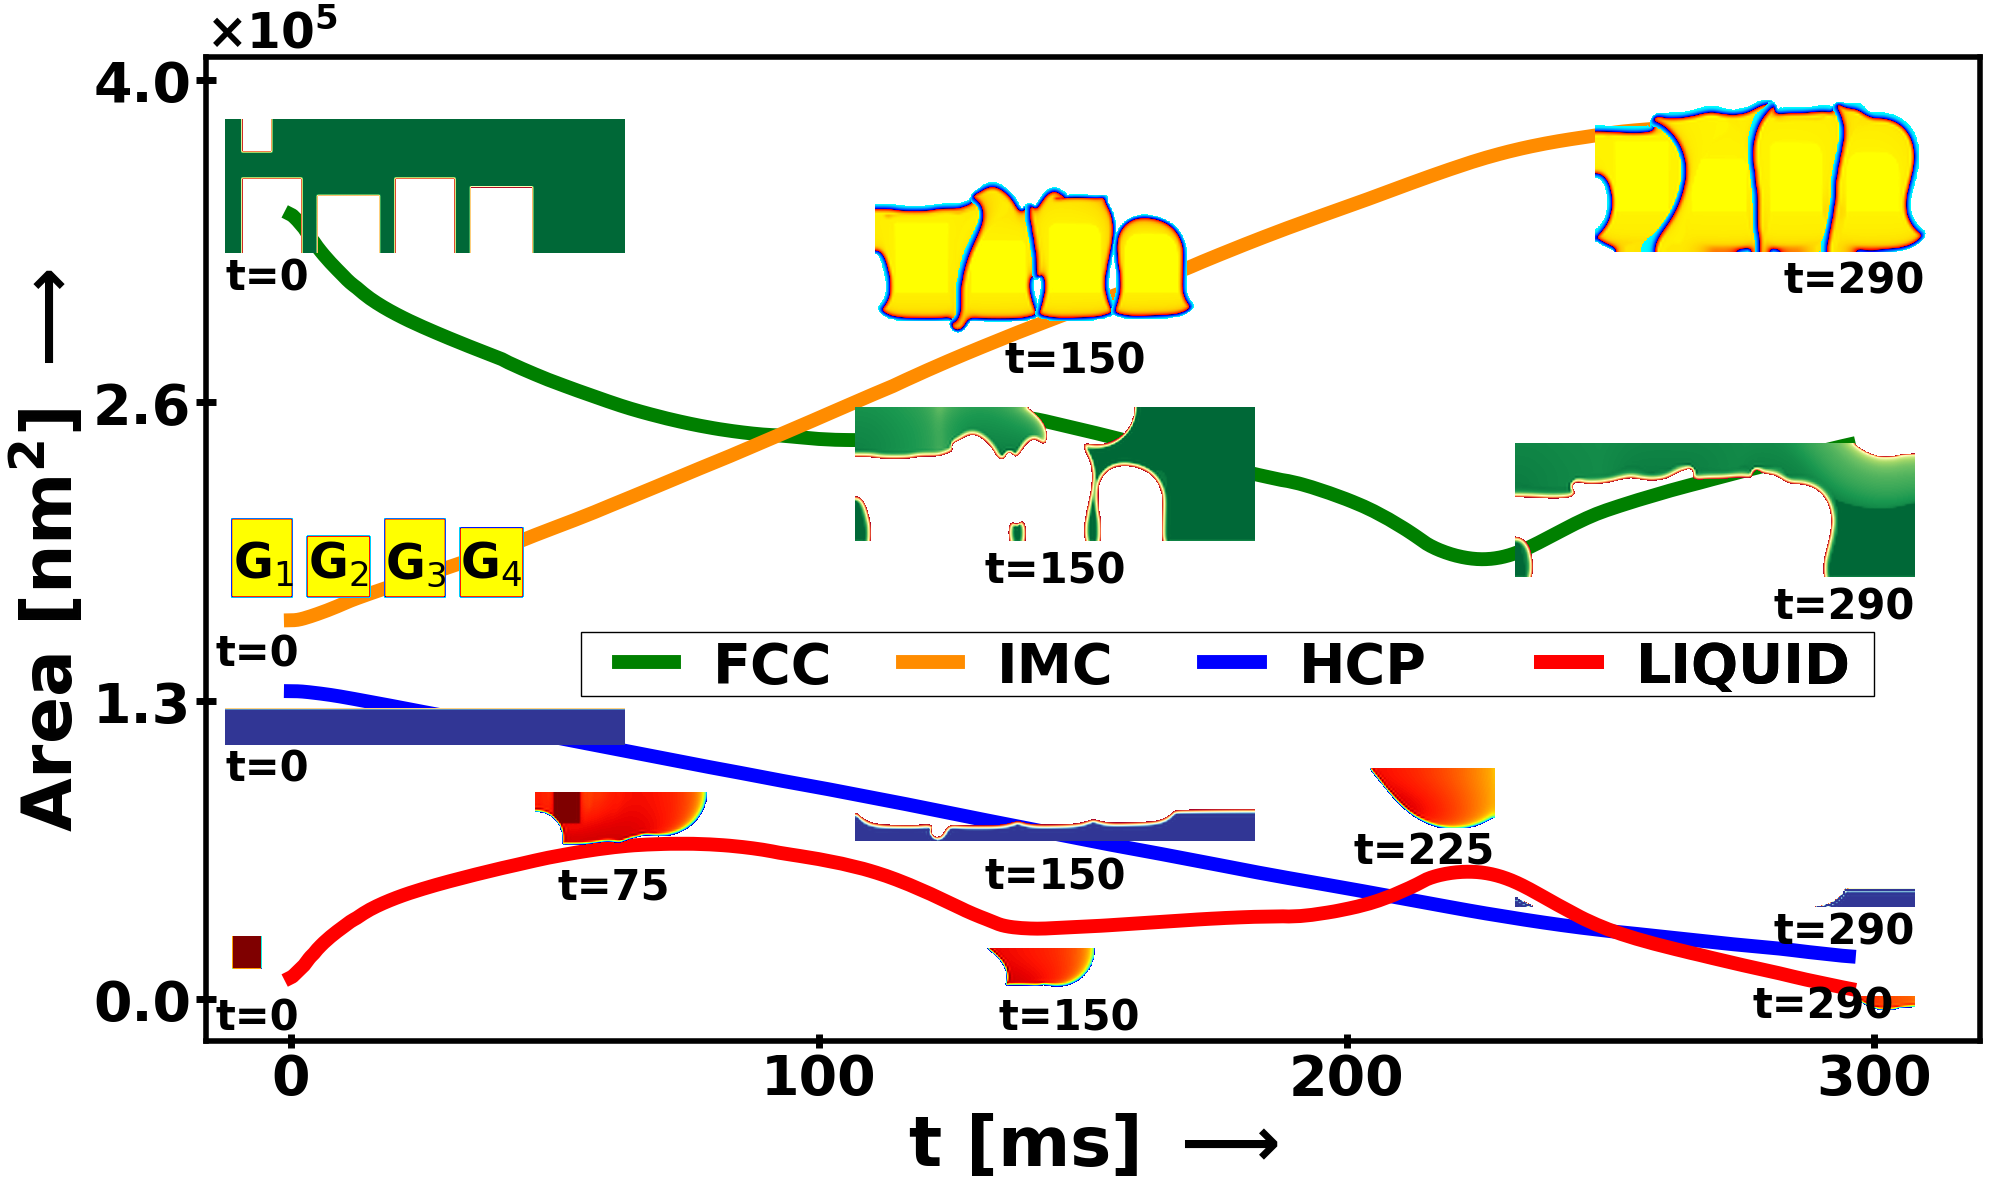

In [6]:
t1 = 0
t2a = 99
t2 = 321 #500
t3a = 800
t3 = 1010
t_step = 1015

fig, ax1 = plt.subplots(1, 1, figsize=[20, 12], frameon=True)
ax1.set_facecolor((0, 0, 0, 0))

hmap_sol = ax1.plot(real_time[:t_step], area_df1['area_h7'][:t_step], color='green', label='FCC', linewidth=10)
hmap_IMC_tot = ax1.plot(real_time[:t_step], area_df1['area_IMC_total'][:t_step], color='darkorange', label='IMC', linewidth=10)
hmap_Ti = ax1.plot(real_time[:t_step], area_df1['area_h1'][:t_step], color='blue', label='HCP', linewidth=10)
hmap_liq, = ax1.plot(real_time[:t_step], area_df1['area_h6'][:t_step],  color='r', label='LIQUID', linewidth=10)

lines   = ax1.get_lines()
legend_1 = ax1.legend([lines[0]], [lines[0].get_label()], loc=(0.22,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
legend_2 = ax1.legend([lines[1]], [lines[1].get_label()], loc=(0.38,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
legend_3 = ax1.legend([lines[2]], [lines[2].get_label()], loc=(0.55,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
legend_4 = ax1.legend([lines[3]], [lines[3].get_label()], loc=(0.74,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
ax1.add_artist(legend_1)
ax1.add_artist(legend_2)
ax1.add_artist(legend_3)
ax1.add_artist(legend_4)
ax1.add_patch(patches.Rectangle((55, 1.32e5), 245, 0.28e5, linewidth=1, edgecolor='k', facecolor='none'))

ax1.set_xlabel(r"t [ms] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, color='k')
ax1.set_ylabel(r"Area [nm$\mathbf{^2}$] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, color='k')
ax1.set_yticks([0, 1.3e5, 2.6e5, 4.0e5,], labels=[ '0.0', r'1.3', r'2.6', '4.0',], size=40, color='k', rotation=0,  weight='bold')
ax1.set_xticks([0, 100, 200, 300], labels=['0', '100', '200', '300'], size=40, color='k', weight='bold')
ax1.set_title(r'$\mathbf{\times10^5}$', pad=0, loc='left', color='black', fontsize=35, weight='bold')
ax1.tick_params(axis='y', direction='inout', which='both', length=15, width=5)
ax1.tick_params(axis='x', direction='inout', which='both', length=10, width=5)
ax1.spines[:].set_linewidth(4)

ax1.set_xlim(-16, 320)
ax1.set_ylim(-0.18e5, 4.1e5)
    

##################################################
######### Meltpool ##########
##################################################

############################## t1 #############
ax5 = fig.add_axes([0.11, 0.09, 0.20, 0.20], frameon=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_1 = ax5.imshow(Au_LIQ[:56,:,t1], cmap=cmap, vmin=0.5, vmax=1, interpolation='bilinear')
# ax5.text(15, 45, s= f't={t1}', weight='bold', fontsize=15)
ax5.set_xlabel(f't={real_time[t1]:.0f}', labelpad=0, weight='bold', loc='left', fontsize=30)
# ax5.set_zorder(2)

############################## t2a #############
ax6a = fig.add_axes([0.27, 0.21, 0.20, 0.20], frameon=False) 
ax6a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax6a.imshow(Au_LIQ[:56,:,t2a], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax6a.text(x=20, y=98, s=f't={real_time[t2a]:.0f}', weight='bold', fontsize=30)

############################## t2 #############
ax6 = fig.add_axes([0.41, 0.08, 0.20, 0.20], frameon=False) 
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax6.imshow(Au_LIQ[:56,:,t2], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
# ax6.set_xlabel(f't={t2}',labelpad=-5.0, weight='bold', loc='center',  fontsize=15)
ax6.text(x=170, y=75, s=f't={real_time[t2]:.0f}', weight='bold', fontsize=30)

############################## t3a #############
ax7a = fig.add_axes([0.55, 0.23, 0.20, 0.20], frameon=False) 
ax7a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax7a.imshow(Au_LIQ[:56,:,t3a], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax7a.set_xlabel(f't={real_time[t3a]:.0f}', labelpad=2.0, weight='bold', loc='right', fontsize=30)
# ax7a.text(x=55, y= 75, s=f't={t3a}', weight='bold', fontsize='15')

############################# t3 #############
ax7 = fig.add_axes([0.76, 0.04, 0.20, 0.20], frameon=False) 
ax7.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_3 = ax7.imshow(Au_LIQ[:56,:,t3], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
# ax7.set_xlabel(f't={t3}',labelpad=-20, weight='bold', loc='right', fontsize=15)
ax7.text(x=220, y= 20, s=f't={real_time[t3]:.0f}', weight='bold', fontsize=30)


######### HCP ##########
##################################################
############################## t1 #############
ax8 = fig.add_axes([0.115, 0.29, 0.20, 0.20], frameon=False) 
ax8.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
imc2t1 = ax8.imshow(Ti[125:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
# ax8.text(10, 45, s= f't={t1}', weight='bold')
ax8.set_xlabel(f't={real_time[t1]:.0f}', labelpad=1.8, weight='bold',loc='left', fontsize=30)

############################## t2 #############
ax9 = fig.add_axes([0.43, 0.21, 0.20, 0.20], frameon=False) 
ax9.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
imc2t2 = ax9.imshow(Ti[125:,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax9.set_xlabel(f't={real_time[t2]:.0f}',labelpad=10, weight='bold',  fontsize=30)

############################# t3 #############
ax10 = fig.add_axes([0.76, 0.155, 0.20, 0.20], frameon=False) 
ax10.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
imc2t3 = ax10.imshow(Ti[125:,:,t3], cmap=cmap, vmin=0.95, vmax=1.0, interpolation='bilinear')
ax10.set_xlabel(f't={real_time[t3]:.0f}',labelpad=2, weight='bold',  loc='right',fontsize=30)


######## FCC ##########
#################################################
############################## t = 0 #############
ax11 = fig.add_axes([0.115, 0.74, 0.20, 0.20], frameon=False) 
ax11.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
imc2t1 = ax11.imshow(Au_SOL[:125,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
# ax8.text(10, 45, s= f't={t1}', weight='bold')
ax11.set_xlabel(f't={real_time[t1]:.0f}', labelpad=2, weight='bold',  loc='left', fontsize=30)

############################## t2 #############
ax12 = fig.add_axes([0.43, 0.50, 0.20, 0.20], frameon=False) 
ax12.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
imc2t2 = ax12.imshow(Au_SOL[:125,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax12.set_xlabel(f't={real_time[t2]:.0f}',labelpad=5.8, weight='bold',  fontsize=30)

############################# t = 800 #############
ax13 = fig.add_axes([0.76, 0.47, 0.20, 0.20], frameon=False) 
ax13.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
imc2t3 = ax13.imshow(Au_SOL[:125,:,t3], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax13.set_xlabel(f't={real_time[t3]:.0f}',labelpad=5.8, weight='bold', loc='right', fontsize=30)


####### IMC grains 
##################################################
############################## t = 0 #############
ax2 = fig.add_axes([0.11, 0.44, 0.20, 0.20], frameon=False) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t1 = ax2.imshow(IMC1[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t1 = ax2.imshow(IMC2[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t1 = ax2.imshow(IMC3[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t1 = ax2.imshow(IMC4[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc1txt1 = ax2.text(16,110,'G$_{1}$', fontsize = 35, weight='bold')
imc2txt1 = ax2.text(86,110,'G$_{2}$', fontsize = 35, weight='bold')
imc3txt1 = ax2.text(157,110,'G$_{3}$', fontsize = 35, weight='bold')
imc4txt1 = ax2.text(227,110,'G$_{4}$', fontsize = 35, weight='bold')
ax2.set_xlabel(f't={real_time[t1]:.0f}', labelpad=0, weight='bold', loc='left', fontsize=30)

############################## t = 100 #############
ax3 = fig.add_axes([0.44, 0.69, 0.20, 0.20], frameon=False) 
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t2 = ax3.imshow(IMC1[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t2 = ax3.imshow(IMC2[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t2 = ax3.imshow(IMC3[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t2 = ax3.imshow(IMC4[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax3.set_xlabel(f't={real_time[t2]:.0f}',labelpad=5, weight='bold', loc='center', fontsize=30)

############################# t = 200 #############
ax4 = fig.add_axes([0.8, 0.775, 0.165, 0.165], frameon=False) 
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t3 = ax4.imshow(IMC1[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t3 = ax4.imshow(IMC2[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t3 = ax4.imshow(IMC3[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t3 = ax4.imshow(IMC4[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax4.set_xlabel(f't={real_time[t3]:.0f}', labelpad=5, weight='bold', loc='right', fontsize=30)


plt.tight_layout()
# plt.savefig('figures/m1/Area_over_time_M1.png', format='png', bbox_inches='tight',  dpi=800)
plt.show()

## Area and Phase

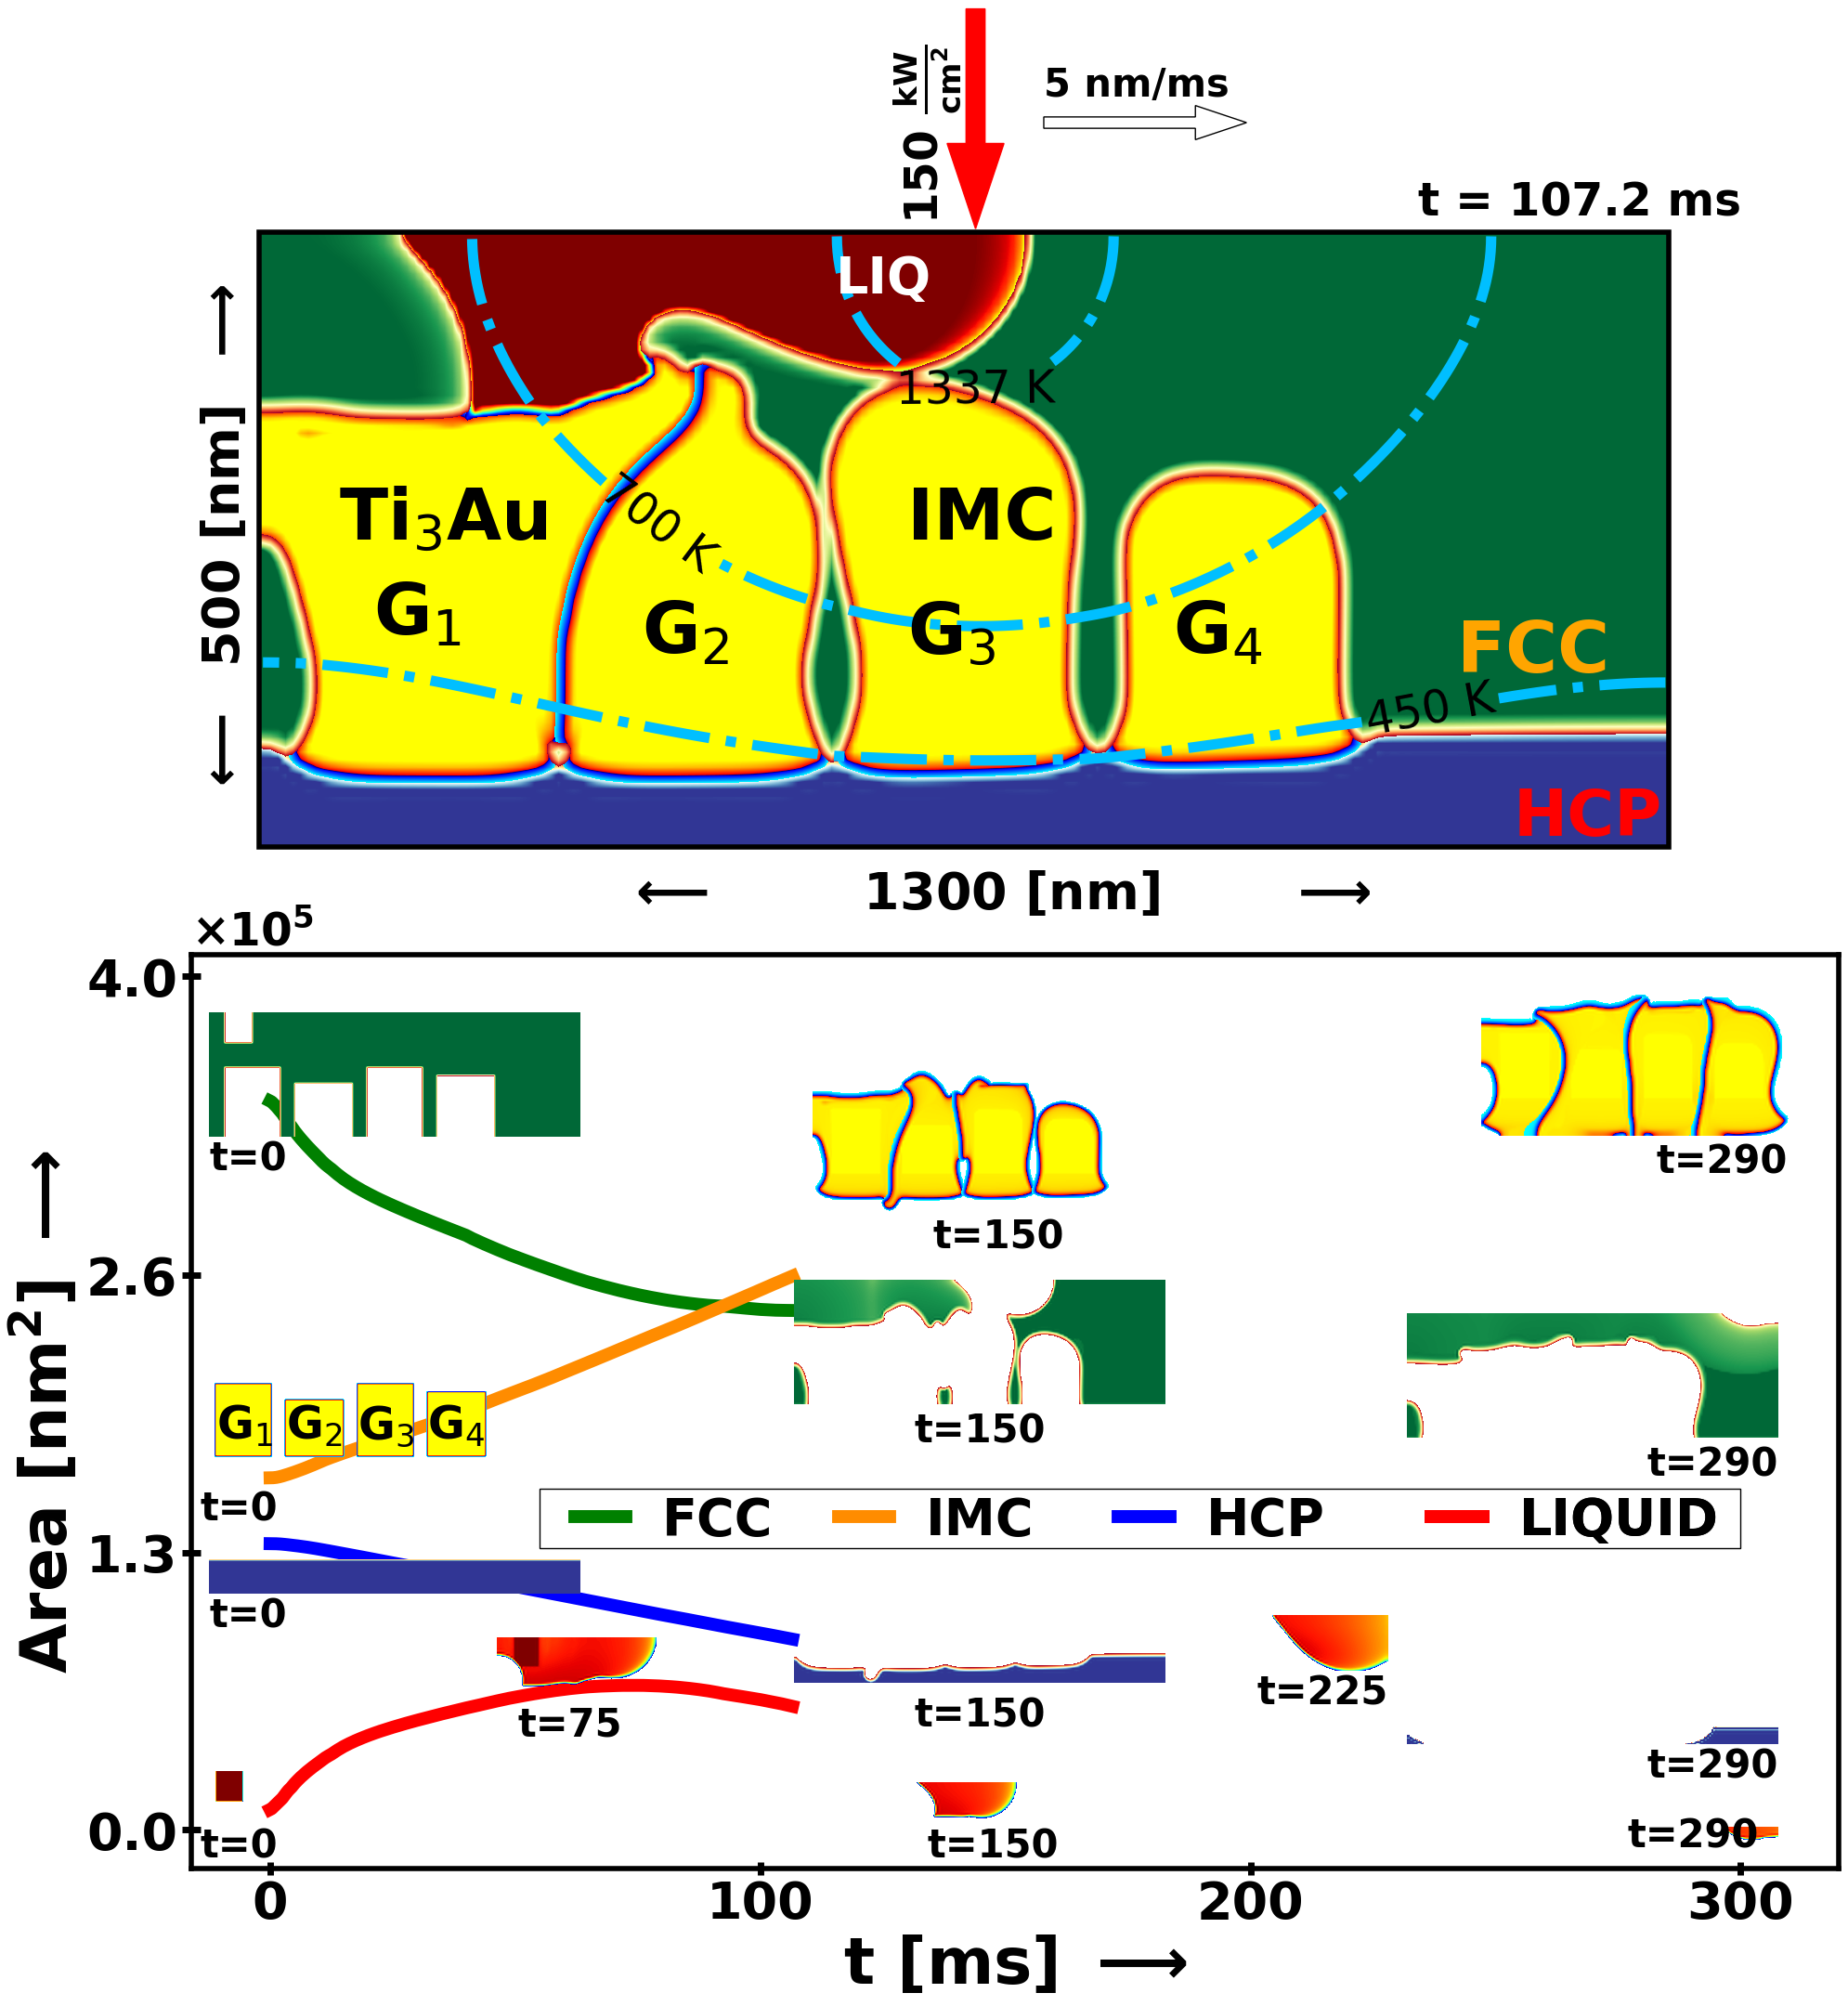

In [37]:
t1 = 0
t2a = 99
t2 = 321
t3a = 800
t3 = 1010
t_step = 151
# t_step_for_laser_in_phase = 150

scan_speed = '5'
irradiance = r"150 $\mathbf{\frac{kW}{cm^2}}$"

end_step = len(time_ms)
meltpool_front = leading_front(array=Au_LIQ, condition=0.85, end_time_step= end_step) 

mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
max_temp_dt = max_temp_index[2]+mid_dt 

laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

## Finding the time step at which the specimen cools below melting temperature near the end of simulation  
total_time_steps = temp.shape[2]-1
dt_ = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 1337)

fig, ax1 = plt.subplots(1, 1, figsize=[20, 12])
ax1.clear()

hmap_sol = ax1.plot(real_time[:t_step], area_df1['area_h7'][:t_step], color='green', label='FCC', linewidth=10)
hmap_IMC_tot = ax1.plot(real_time[:t_step], area_df1['area_IMC_total'][:t_step], color='darkorange', label='IMC', linewidth=10)
hmap_Ti = ax1.plot(real_time[:t_step], area_df1['area_h1'][:t_step], color='blue', label='HCP', linewidth=10)
hmap_liq, = ax1.plot(real_time[:t_step], area_df1['area_h6'][:t_step],  color='r', label='LIQUID', linewidth=10)

lines   = ax1.get_lines()
legend_1 = ax1.legend([lines[0]], [lines[0].get_label()], loc=(0.22,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
legend_2 = ax1.legend([lines[1]], [lines[1].get_label()], loc=(0.38,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
legend_3 = ax1.legend([lines[2]], [lines[2].get_label()], loc=(0.55,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
legend_4 = ax1.legend([lines[3]], [lines[3].get_label()], loc=(0.74,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
ax1.add_artist(legend_1)
ax1.add_artist(legend_2)
ax1.add_artist(legend_3)
ax1.add_artist(legend_4)
ax1.add_patch(patches.Rectangle((55, 1.32e5), 245, 0.28e5, linewidth=1, edgecolor='k', facecolor='none'))

ax1.set_xlabel(r"t [ms] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, color='k')
ax1.set_ylabel(r"Area [nm$\mathbf{^2}$] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, color='k')
ax1.set_yticks([0, 1.3e5, 2.6e5, 4.0e5,], labels=[ '0.0', r'1.3', r'2.6', '4.0',], size=40, color='k', rotation=0,  weight='bold')
ax1.set_xticks([0, 100, 200, 300], labels=['0', '100', '200', '300'], size=40, color='k', weight='bold')
ax1.set_title(r'$\mathbf{\times10^5}$', pad=0, loc='left', color='black', fontsize=35, weight='bold')
ax1.tick_params(axis='y', direction='inout', which='both', length=15, width=5)
ax1.tick_params(axis='x', direction='inout', which='both', length=10, width=5)
ax1.spines[:].set_linewidth(4)

ax1.set_xlim(-16, 320)
ax1.set_ylim(-0.18e5, 4.1e5)
    

############################## t0 #############
ax2 = fig.add_axes([0.11, 0.44, 0.20, 0.20], frameon=False) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t1 = ax2.imshow(IMC1[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t1 = ax2.imshow(IMC2[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t1 = ax2.imshow(IMC3[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t1 = ax2.imshow(IMC4[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc1txt1 = ax2.text(16,110,'G$_{1}$', fontsize = 35, weight='bold')
imc2txt1 = ax2.text(86,110,'G$_{2}$', fontsize = 35, weight='bold')
imc3txt1 = ax2.text(157,110,'G$_{3}$', fontsize = 35, weight='bold')
imc4txt1 = ax2.text(227,110,'G$_{4}$', fontsize = 35, weight='bold')
ax2.set_xlabel(f't={real_time[t1]:.0f}', labelpad=0, weight='bold', loc='left', fontsize=30)

################### Meltpool t0 #############
ax5 = fig.add_axes([0.11, 0.09, 0.20, 0.20], frameon=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_1 = ax5.imshow(Au_LIQ[:56,:,t1], cmap=cmap, vmin=0.5, vmax=1, interpolation='bilinear')
ax5.set_xlabel(f't={real_time[t1]:.0f}', labelpad=0, weight='bold', loc='left', fontsize=30)

################# FCC t0 #############
ax11 = fig.add_axes([0.115, 0.74, 0.20, 0.20], frameon=False) 
ax11.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
fcct1 = ax11.imshow(Au_SOL[:125,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax11.set_xlabel(f't={real_time[t1]:.0f}', labelpad=2, weight='bold',  loc='left', fontsize=30)

################## Ti t0 #############
ax8 = fig.add_axes([0.115, 0.29, 0.20, 0.20], frameon=False) 
ax8.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
hcpt1 = ax8.imshow(Ti[125:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax8.set_xlabel(f't={real_time[t1]:.0f}', labelpad=1.8, weight='bold',loc='left', fontsize=30)

################# Meltpool t2a #############
ax6a = fig.add_axes([0.27, 0.21, 0.20, 0.20], frameon=False) 
ax6a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax6a.imshow(Au_LIQ[:56,:,t2a], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax6a.text(x=20, y=98, s=f't={real_time[t2a]:.0f}', weight='bold', fontsize=30)


################## IMC t2 #############
ax3 = fig.add_axes([0.44, 0.69, 0.20, 0.20], frameon=False) 
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t2 = ax3.imshow(IMC1[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t2 = ax3.imshow(IMC2[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t2 = ax3.imshow(IMC3[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t2 = ax3.imshow(IMC4[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax3.set_xlabel(f't={real_time[t2]:.0f}',labelpad=5, weight='bold', loc='center', fontsize=30)

############### Meltpool t2 #############        
ax6 = fig.add_axes([0.41, 0.08, 0.20, 0.20], frameon=False) 
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax6.imshow(Au_LIQ[:56,:,t2], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax6.text(x=170, y=75, s=f't={real_time[t2]:.0f}', weight='bold', fontsize=30)

############### FCC t2 #############
ax12 = fig.add_axes([0.43, 0.50, 0.20, 0.20], frameon=False) 
ax12.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
fcct2 = ax12.imshow(Au_SOL[:125,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax12.set_xlabel(f't={real_time[t2]:.0f}',labelpad=5.8, weight='bold',  fontsize=30)

################## Ti t2 #############
ax9 = fig.add_axes([0.43, 0.21, 0.20, 0.20], frameon=False) 
ax9.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
hcpt2 = ax9.imshow(Ti[125:,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax9.set_xlabel(f't={real_time[t2]:.0f}',labelpad=10, weight='bold',  fontsize=30)


############# Meltpool t3a #############
ax7a = fig.add_axes([0.55, 0.23, 0.20, 0.20], frameon=False) 
ax7a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_3a = ax7a.imshow(Au_LIQ[:56,:,t3a], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax7a.set_xlabel(f't={real_time[t3a]:.0f}', labelpad=2.0, weight='bold', loc='right', fontsize=30)


################## IMC t3 #############
ax4 = fig.add_axes([0.8, 0.775, 0.165, 0.165], frameon=False) 
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t3 = ax4.imshow(IMC1[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t3 = ax4.imshow(IMC2[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t3 = ax4.imshow(IMC3[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t3 = ax4.imshow(IMC4[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax4.set_xlabel(f't={real_time[t3]:.0f}', labelpad=5, weight='bold', loc='right', fontsize=30)

################# Meltpool t3 #############
ax7 = fig.add_axes([0.76, 0.04, 0.20, 0.20], frameon=False) 
ax7.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_3 = ax7.imshow(Au_LIQ[:56,:,t3], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax7.text(x=220, y= 20, s=f't={real_time[t3]:.0f}', weight='bold', fontsize=30)

############### Au SOLID t3 #############
ax13 = fig.add_axes([0.76, 0.47, 0.20, 0.20], frameon=False) 
ax13.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
fcct3 = ax13.imshow(Au_SOL[:125,:,t3], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax13.set_xlabel(f't={real_time[t3]:.0f}',labelpad=5.8, weight='bold', loc='right', fontsize=30)

############### Ti t3 #############
ax10 = fig.add_axes([0.76, 0.155, 0.20, 0.20], frameon=False) 
ax10.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
hcpt3 = ax10.imshow(Ti[125:,:,t3], cmap=cmap, vmin=0.95, vmax=1.0, interpolation='bilinear')
ax10.set_xlabel(f't={real_time[t3]:.0f}',labelpad=2, weight='bold',  loc='right',fontsize=30)


# ####################################################
# ################ Phase Growth at Top ###############
# ####################################################

# # t_step = t_step_for_laser_in_phase

ax14 = fig.add_axes([0.14, 1.02, 0.8, 0.6], frameon=True) 
ax14.clear()
ax14.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)
####################################################
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0)
hmap1 = ax14.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
Ti_txt = ax14.text(330, 158,'HCP', fontsize = 50, weight='bold', color='red')

cmap=cold2hot
cmap.set_under('white', alpha=0) 
hmap21 = ax14.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax14.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax14.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax14.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
imc1txt = ax14.text(20, 80,'Ti$_3$Au', fontsize = 55, weight='bold')
imc1txt = ax14.text(29, 105,'G$_{1}$', fontsize = 55, weight='bold')
imc2txt = ax14.text(100,110,'G$_{2}$', fontsize = 55, weight='bold')
imc3txt = ax14.text(170,110,'G$_{3}$', fontsize = 55, weight='bold')
imc3txt = ax14.text(170,80,'IMC', fontsize = 55, weight='bold')
imc4txt = ax14.text(240,110,'G$_{4}$', fontsize = 55, weight='bold')

cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0)
hmap3 = ax14.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
if t_step<20:
    meltpool_txt = ax14.text(max_temp_pos[1]-18,15,'LIQ', fontsize = 40, weight='bold', color='white')
elif t_step>1000:
    meltpool_txt = ax1.text(300,20,'LIQ', fontsize = 45, weight='bold', color='none')
else:
    meltpool_txt = ax14.text(meltpool_front[t_step]-45,15,'LIQ', fontsize = 40, weight='bold', color='white')

cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
hmap4 = ax14.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
AuSOL_txt = ax14.text(315,115,'FCC', fontsize = 55, weight='bold', color='orange')

######################### Laser Arrow ###########################
if max_temp_pos[1]<370 and t_step<1015:
    
    ax14.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='k', fontsize=35, weight='bold')
    ax14.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
    
    if t_step <200:
        ax14.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax14.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
        ax14.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=35, weight='bold')
    else:
        ax14.arrow(max_temp_pos[1]-90, -30, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax14.text(max_temp_pos[1]-90, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
        ax14.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
else:
    ax14.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax14.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax14.text(150+5,-10, irradiance, rotation=90, color='none', fontsize=35, weight='bold')
    ax14.arrow(150, -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)

    ax14.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax14.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=45, weight='bold')
        


ax14.set_ylim(162, -2)
ax14.set_xlim(-2,390)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=8, linestyles='dashdot')
clabels = plt.clabel(contour, inline=True, fontsize=35, colors='k', fmt='%1.0f K')

################## Dimensions ###################
ax14.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', labelpad=15, fontsize = 40, weight ='bold',)
ax14.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.02, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 40, weight = 'bold',
             color='k', ha='center', va='center')

ax14.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax14.spines[:].set_linewidth(0)
ax14.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))

plt.tight_layout()

# plt.savefig('figures/m1/Area_Phase_Combined_M1.png', format='png', bbox_inches='tight',  dpi=800)

plt.show()

In [ ]:
t1 = 0
t100 = 100
t2 = 500
t800 = 800
t3 = 1010
t_step = 1024

scan_speed = '5'
irradiance = r"150 $\mathbf{\frac{kW}{cm^2}}$"

end_step = len(time_ms)
meltpool_front = leading_front(array=Au_LIQ, condition=0.85, end_time_step= end_step) 

mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
max_temp_dt = max_temp_index[2]+mid_dt 

laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

## Finding the time step at which the specimen cools below melting temperature near the end of simulation  
total_time_steps = temp.shape[2]-1
dt_ = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 1337)

fig, ax1 = plt.subplots(1, 1, figsize=[16, 10])
ax1.clear()
hmap_sol = ax1.plot(area_df1['area_h7'][:],color='green', label='Au$_{SOL}$', linewidth=8)
hmap_IMC_tot = ax1.plot(area_df1['area_IMC_total'][:],color='darkorange', label='IMC', linewidth=8)
hmap_Ti = ax1.plot(area_df1['area_h1'][:],color='blue', label='Ti', linewidth=8)
hmap_liq, = ax1.plot(area_df1['area_h6'][:], color='r', label='Au$_{LIQ}$', linewidth=8)

lines   = ax1.get_lines()
legend_1 = ax1.legend([lines[0]], [lines[0].get_label()], loc=(0.35,0.30), prop={'weight':'bold', 'size':'20',}, handlelength=1.0, handletextpad=0.15, frameon=True)
legend_2 = ax1.legend([lines[1]], [lines[1].get_label()], loc=(0.51,0.30), prop={'weight':'bold', 'size':'20',}, handlelength=1.0, handletextpad=0.15, frameon=True)
legend_3 = ax1.legend([lines[2]], [lines[2].get_label()], loc=(0.65,0.30), prop={'weight':'bold', 'size':'20',}, handlelength=1.0, handletextpad=0.15, frameon=True)
legend_4 = ax1.legend([lines[3]], [lines[3].get_label()], loc=(0.76,0.30), prop={'weight':'bold', 'size':'20',}, handlelength=1.0, handletextpad=0.15, frameon=True)
ax1.add_artist(legend_1)
ax1.add_artist(legend_2)
ax1.add_artist(legend_3)
ax1.add_artist(legend_4)

ax1.set_xlabel(r"$\Delta$t $\longrightarrow$", weight = 'bold', size=45, color='k')
# ax1.text(x=505, y=-75000, s=f'({t_step})', fontsize=25, color='brown', weight='bold')
ax1.set_ylabel(r"Area nm$^2$", weight = 'bold', size=45, color='k')
ax1.get_yaxis().get_offset_text().set_position((0.00, 0))
ax1.ticklabel_format(axis='y', style='scientific', scilimits=(0,0),useMathText=False, )
ax1.yaxis.offsetText.set(size=25, weight='bold', color='yellow')
ax1.set_xticks([0, 200, 400, 600, 800, 1000 ], labels=['0', '200', '400', '600', '800', '1000' ])
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.tick_params(axis='x', labelcolor='k', labelsize=30, length=8, width=3, )
ax1.tick_params(axis='y', labelcolor='k', labelsize=30, length=8, width=3, )
ax1.yaxis.set_tick_params(labelcolor='k')  
ax1.set_xlim(-40, 1050)
ax1.set_ylim(-0.25e5, 4.05e5)
for label in ax1.get_xticklabels(): label.set_fontweight('bold')
for label in ax1.get_yticklabels(): label.set_fontweight('bold')

# ax1.vlines(x=1010, ymin=0, ymax=4e5 )

# ################# IMC t = 0 #############
ax2 = fig.add_axes([0.12, 0.44, 0.20, 0.20], frameon=False) 
ax2.clear()
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t1 = ax2.imshow(IMC1[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t1 = ax2.imshow(IMC2[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t1 = ax2.imshow(IMC3[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t1 = ax2.imshow(IMC4[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc1txt1 = ax2.text(25,100,'G$_{1}$', fontsize = 15, weight='bold')
imc2txt1 = ax2.text(95,100,'G$_{2}$', fontsize = 15, weight='bold')
imc3txt1 = ax2.text(170,100,'G$_{3}$', fontsize = 15, weight='bold')
imc4txt1 = ax2.text(240,100,'G$_{4}$', fontsize = 15, weight='bold')
ax2.set_xlabel(f't={t1}', labelpad=-15, weight='bold', loc='left', fontsize=20)

################# Meltpool t = 0 #############
ax5 = fig.add_axes([0.12, 0.105, 0.20, 0.20], frameon=False)
ax5.clear()
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_1 = ax5.imshow(Au_LIQ[:56,:,t1], cmap=cmap, vmin=0.5, vmax=1, interpolation='bilinear')
ax5.set_xlabel(f't={t1}', labelpad=-10, weight='bold', loc='left', fontsize=20)

################# Au SOLID t = 0 #############
ax11 = fig.add_axes([0.12, 0.69, 0.20, 0.20], frameon=False) 
ax11.clear()
ax11.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
imc2t1 = ax11.imshow(Au_SOL[:125,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax11.set_xlabel(f't={t1}', labelpad=1.8, weight='bold',  loc='left', fontsize=20)

################## Ti t = 0 #############
ax8 = fig.add_axes([0.12, 0.30, 0.20, 0.20], frameon=False) 
ax8.clear()
ax8.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
imc2t1 = ax8.imshow(Ti[125:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
ax8.set_xlabel(f't={t1}', labelpad=1.8, weight='bold',loc='left', fontsize=20)



################# Meltpool t = 100 #############
ax6a = fig.add_axes([0.15, 0.20, 0.20, 0.20], frameon=False)
ax6a.clear()
ax6a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax6a.imshow(Au_LIQ[:56,:,t100], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax6a.text(x=50, y= 75, s=f't={t100}', weight='bold', fontsize='20')
        

################## IMC t = 500 #############
ax3 = fig.add_axes([0.43, 0.75, 0.20, 0.20], frameon=False)
ax3.clear()
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t2 = ax3.imshow(IMC1[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t2 = ax3.imshow(IMC2[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t2 = ax3.imshow(IMC3[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t2 = ax3.imshow(IMC4[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc1txt2 = ax3.text(25,100,'G$_{1}$', fontsize = 15, weight='bold')
imc2txt2 = ax3.text(95,100,'G$_{2}$', fontsize = 15, weight='bold')
imc3txt2 = ax3.text(170,100,'G$_{3}$', fontsize = 15, weight='bold')
imc4txt2 = ax3.text(240,100,'G$_{4}$', fontsize = 15, weight='bold')
ax3.set_xlabel(f't={t2}',labelpad=5, weight='bold', loc='center', fontsize=20)

############### Meltpool t = 500 #############        
ax6 = fig.add_axes([0.40, 0.11, 0.20, 0.20], frameon=False) 
ax6.clear()
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax6.imshow(Au_LIQ[:56,:,t2], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax6.text(x=200, y= 75, s=f't={t2}', weight='bold', fontsize='20')

############### Au SOLID t = 500 #############
ax12 = fig.add_axes([0.43, 0.51, 0.20, 0.20], frameon=False) 
ax12.clear()
ax12.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
imc2t2 = ax12.imshow(Au_SOL[:125,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax12.set_xlabel(f't={t2}',labelpad=5.8, weight='bold',  fontsize=20)

################## Ti t = 500 #############
ax9 = fig.add_axes([0.43, 0.21, 0.20, 0.20], frameon=False) 
ax9.clear()
ax9.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
imc2t2 = ax9.imshow(Ti[125:,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax9.set_xlabel(f't={t2}',labelpad=10, weight='bold',  fontsize=20)


############# Su LIQUID t = 800 #############
ax7a = fig.add_axes([0.60, 0.22, 0.20, 0.20], frameon=False) 
ax7a.clear()
ax7a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_2 = ax7a.imshow(Au_LIQ[:56,:,t800], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax7a.set_xlabel(f't={t800}',labelpad=4.0, weight='bold', loc='right', fontsize=20)    



################## IMC t = 1010 #############
ax4 = fig.add_axes([0.78, 0.79, 0.20, 0.20], frameon=False) 
ax4.clear()
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap=cold2hot
cmap.set_under('white', alpha=0) 
imc1t3 = ax4.imshow(IMC1[:,:,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc2t3 = ax4.imshow(IMC2[:,:,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc3t3 = ax4.imshow(IMC3[:,:,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc4t3 = ax4.imshow(IMC4[:,:,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
imc1txt3 = ax4.text(25,100,'G$_{1}$', fontsize = 15, weight='bold')
imc2txt3 = ax4.text(95,100,'G$_{2}$', fontsize = 15, weight='bold')
imc3txt3 = ax4.text(170,100,'G$_{3}$', fontsize = 15, weight='bold')
imc4txt3 = ax4.text(240,100,'G$_{4}$', fontsize = 15, weight='bold')
ax4.set_xlabel(f't={t3}', labelpad=5, weight='bold', loc='right', fontsize=20)

################# Meltpool t = 1010 #############
ax7 = fig.add_axes([0.78, 0.05, 0.20, 0.20], frameon=False) 
ax7.clear()
ax7.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0) 
meltpool_3 = ax7.imshow(Au_LIQ[:56,:,t3], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
ax7.text(x=180, y= 20, s=f't={t3}', weight='bold', fontsize='20')

############### Au SOLID t = 1010 #############
ax13 = fig.add_axes([0.78, 0.48, 0.20, 0.20], frameon=False) 
ax13.clear()
ax13.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
imc2t3 = ax13.imshow(Au_SOL[:125,:,t3], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
ax13.set_xlabel(f't={t3}',labelpad=5.8, weight='bold', loc='right', fontsize=20)

############### Ti t = 1010 #############
ax10 = fig.add_axes([0.78, 0.18, 0.20, 0.20], frameon=False) 
ax10.clear()
ax10.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0) 
imc2t3 = ax10.imshow(Ti[125:,:,t3], cmap=cmap, vmin=0.95, vmax=1.0, interpolation='bilinear')
ax10.set_xlabel(f't={t3}',labelpad=2, weight='bold',  loc='right',fontsize=20)



ax14 = fig.add_axes([0.14, 1.0, 0.8, 0.6], frameon=True) 
ax14.clear()
ax14.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# scan_speed = '5'  # micro meter per sec ==> 5e-4 * t (1e-7m / 1e-9s)

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)
####################################################
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0)
hmap1 = ax14.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
Ti_txt = ax14.text(345, 158,'Ti', fontsize = 30, weight='bold', color='red')

cmap=cold2hot
cmap.set_under('white', alpha=0) 
hmap21 = ax14.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax14.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax14.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax14.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
imc1txt3 = ax14.text(20, 80,'Ti$_3$Au', fontsize = 25, weight='bold')
imc1txt3 = ax14.text(32, 105,'G$_{1}$', fontsize = 30, weight='bold')
imc2txt3 = ax14.text(90, 90,'Ti$_3$Au', fontsize = 25, weight='bold')
imc2txt3 = ax14.text(105,110,'G$_{2}$', fontsize = 30, weight='bold')
imc3txt3 = ax14.text(160, 90,'Ti$_3$Au', fontsize = 25, weight='bold')
imc3txt3 = ax14.text(175,110,'G$_{3}$', fontsize = 30, weight='bold')
imc4txt3 = ax14.text(232, 90,'Ti$_3$Au', fontsize = 25, weight='bold')
imc4txt3 = ax14.text(245,110,'G$_{4}$', fontsize = 30, weight='bold')

cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0)
hmap3 = ax14.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
if t_step<20:
    meltpool_txt = ax14.text(max_temp_pos[1]-18,20,'Au$_{LIQ}$', fontsize = 30, weight='bold', color='white')
else:
    meltpool_txt = ax14.text(meltpool_front[t_step]-45,20,'Au$_{LIQ}$', fontsize = 30, weight='bold', color='white')

cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
hmap4 = ax14.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
AuSOL_txt = ax14.text(320,115,'Au$_{SOL}$', fontsize = 30, weight='bold', color='orange')

######################### Laser Arrow ###########################
if t_step<=max_temp_dt:
    ax14.text(max_temp_pos[1]-12,-25, "LASER", rotation=90, color='k', fontsize=20, weight='bold')
    ax14.text(max_temp_pos[1]+5,-24, irradiance, rotation=90, color='k', fontsize=20, weight='bold')
    ax14.arrow(max_temp_pos[1], -56, 0, 54,  width = 4, color='red', length_includes_head=True, clip_on=False)
    
    if t_step <150:
        ax14.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax14.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} $nm/ms$', fontsize=25, weight = 'bold')
        ax14.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=30, weight='bold')
    else:
        ax14.arrow(max_temp_pos[1]-70, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax14.text(max_temp_pos[1]-70, -37, s=f'{scan_speed} $nm/ms$', fontsize=25, weight = 'bold')
        ax14.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=30, weight='bold')
else:
    ax14.text(370-50, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax14.text(370-40, -15, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax14.arrow(370-5, -30, -55, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax14.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=25, weight='bold')
    ax14.text(laser_off_position[1]-10,-20, irradiance, rotation=90, color='k', alpha=0, fontsize=15, weight='bold')




ax14.set_ylim(160, -1)
ax14.set_xlim(0,370)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = plt.clabel(contour, inline=True, fontsize=30, colors='k', fmt='%1.0f K')

################## Dimensions ###################
ax14.set_xlabel('$\longleftarrow$                 1300$_{nm}$                $\longrightarrow$', fontsize = 30, weight ='bold',)
ax14.annotate('$\longleftarrow$   500$_{nm}$   $\longrightarrow$', xy=(0.5, 0.5), xytext=(-0.05, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 30, weight = 'bold',
             color='k', ha='center', va='center')

ax14.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.tight_layout()

# plt.savefig('figures/m1/Area_Phase_Combined_M1.png', format='png', bbox_inches='tight',  dpi=800)

plt.show()

## Area Animation

In [ ]:
t1 = 0
t2a = 99
t2 = 321
t3a = 800
t3 = 1010
t_step = 1024

## meltpool front calculated to put text "Au_LIQ" in animation at correct position
end_step = len(time_ms)
meltpool_front = leading_front(array=Au_LIQ, condition=0.85, end_time_step= end_step) 

def update_plot(t_steps, scan_speed, irradiance):
    t_step = t_steps+1
    
    mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
    max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
    max_temp_dt = max_temp_index[2]+mid_dt 

    laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)
    
    ## Finding the time step at which the specimen cools below melting temperature near the end of simulation  
    total_time_steps = temp.shape[2]-1
    dt_ = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 1337)

    fig, ax1 = plt.subplots(1, 1, figsize=[20, 12])
    ax1.clear()
    
    hmap_sol = ax1.plot(real_time[:t_step], area_df1['area_h7'][:t_step], color='green', label='FCC', linewidth=10)
    hmap_IMC_tot = ax1.plot(real_time[:t_step], area_df1['area_IMC_total'][:t_step], color='darkorange', label='IMC', linewidth=10)
    hmap_Ti = ax1.plot(real_time[:t_step], area_df1['area_h1'][:t_step], color='blue', label='HCP', linewidth=10)
    hmap_liq, = ax1.plot(real_time[:t_step], area_df1['area_h6'][:t_step],  color='r', label='LIQUID', linewidth=10)
    
    lines   = ax1.get_lines()
    legend_1 = ax1.legend([lines[0]], [lines[0].get_label()], loc=(0.22,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
    legend_2 = ax1.legend([lines[1]], [lines[1].get_label()], loc=(0.38,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
    legend_3 = ax1.legend([lines[2]], [lines[2].get_label()], loc=(0.55,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
    legend_4 = ax1.legend([lines[3]], [lines[3].get_label()], loc=(0.74,0.33), prop={'weight':'bold', 'size':'40',}, framealpha=0, handlelength=1.0, handletextpad=0.7, frameon=True)
    ax1.add_artist(legend_1)
    ax1.add_artist(legend_2)
    ax1.add_artist(legend_3)
    ax1.add_artist(legend_4)
    ax1.add_patch(patches.Rectangle((55, 1.32e5), 245, 0.28e5, linewidth=1, edgecolor='k', facecolor='none'))
    
    ax1.set_xlabel(r"t [ms] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, color='k')
    ax1.set_ylabel(r"Area [nm$\mathbf{^2}$] $\mathbf{\longrightarrow}$", weight = 'bold', size=50, color='k')
    ax1.set_yticks([0, 1.3e5, 2.6e5, 4.0e5,], labels=[ '0.0', r'1.3', r'2.6', '4.0',], size=40, color='k', rotation=0,  weight='bold')
    ax1.set_xticks([0, 100, 200, 300], labels=['0', '100', '200', '300'], size=40, color='k', weight='bold')
    ax1.set_title(r'$\mathbf{\times10^5}$', pad=0, loc='left', color='black', fontsize=35, weight='bold')
    ax1.tick_params(axis='y', direction='inout', which='both', length=15, width=5)
    ax1.tick_params(axis='x', direction='inout', which='both', length=10, width=5)
    ax1.spines[:].set_linewidth(4)
    
    ax1.set_xlim(-16, 320)
    ax1.set_ylim(-0.18e5, 4.1e5)
    
    
    #################### IMC t0 #############
    ax2 = fig.add_axes([0.11, 0.44, 0.20, 0.20], frameon=False) 
    ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cmap=cold2hot
    cmap.set_under('white', alpha=0) 
    imc1t1 = ax2.imshow(IMC1[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
    imc2t1 = ax2.imshow(IMC2[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
    imc3t1 = ax2.imshow(IMC3[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
    imc4t1 = ax2.imshow(IMC4[:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
    imc1txt1 = ax2.text(16,110,'G$_{1}$', fontsize = 35, weight='bold')
    imc2txt1 = ax2.text(86,110,'G$_{2}$', fontsize = 35, weight='bold')
    imc3txt1 = ax2.text(157,110,'G$_{3}$', fontsize = 35, weight='bold')
    imc4txt1 = ax2.text(227,110,'G$_{4}$', fontsize = 35, weight='bold')
    ax2.set_xlabel(f't={real_time[t1]:.0f}', labelpad=0, weight='bold', loc='left', fontsize=30)

    ################### Meltpool t0 #############
    ax5 = fig.add_axes([0.11, 0.09, 0.20, 0.20], frameon=False)
    ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cmap = plt.get_cmap('jet')
    cmap.set_under('white', alpha=0) 
    meltpool_1 = ax5.imshow(Au_LIQ[:56,:,t1], cmap=cmap, vmin=0.5, vmax=1, interpolation='bilinear')
    ax5.set_xlabel(f't={real_time[t1]:.0f}', labelpad=0, weight='bold', loc='left', fontsize=30)
    
    ################# FCC t0 #############
    ax11 = fig.add_axes([0.115, 0.74, 0.20, 0.20], frameon=False) 
    ax11.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cmap = plt.get_cmap('RdYlGn')
    cmap.set_under('white', alpha=0) 
    fcct1 = ax11.imshow(Au_SOL[:125,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
    ax11.set_xlabel(f't={real_time[t1]:.0f}', labelpad=2, weight='bold',  loc='left', fontsize=30)
    
    ################## Ti t0 #############
    ax8 = fig.add_axes([0.115, 0.29, 0.20, 0.20], frameon=False) 
    ax8.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cmap = plt.get_cmap('RdYlBu')
    cmap.set_under('white', alpha=0) 
    hcpt1 = ax8.imshow(Ti[125:,:,t1], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
    ax8.set_xlabel(f't={real_time[t1]:.0f}', labelpad=1.8, weight='bold',loc='left', fontsize=30)

    
    if t_step>=t2a:
        ################# Meltpool t2a #############
        ax6a = fig.add_axes([0.27, 0.21, 0.20, 0.20], frameon=False) 
        ax6a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('jet')
        cmap.set_under('white', alpha=0) 
        meltpool_2 = ax6a.imshow(Au_LIQ[:56,:,t2a], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
        ax6a.text(x=20, y=98, s=f't={real_time[t2a]:.0f}', weight='bold', fontsize=30)
        
    if t_step>=t2:
        ################## IMC t2 #############
        ax3 = fig.add_axes([0.44, 0.69, 0.20, 0.20], frameon=False) 
        ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap=cold2hot
        cmap.set_under('white', alpha=0) 
        imc1t2 = ax3.imshow(IMC1[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        imc2t2 = ax3.imshow(IMC2[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        imc3t2 = ax3.imshow(IMC3[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        imc4t2 = ax3.imshow(IMC4[:,:,t2], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        ax3.set_xlabel(f't={real_time[t2]:.0f}',labelpad=5, weight='bold', loc='center', fontsize=30)
        
        ############### Meltpool t2 #############        
        ax6 = fig.add_axes([0.41, 0.08, 0.20, 0.20], frameon=False) 
        ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('jet')
        cmap.set_under('white', alpha=0) 
        meltpool_2 = ax6.imshow(Au_LIQ[:56,:,t2], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
        ax6.text(x=170, y=75, s=f't={real_time[t2]:.0f}', weight='bold', fontsize=30)
        
        ############### FCC t2 #############
        ax12 = fig.add_axes([0.43, 0.50, 0.20, 0.20], frameon=False) 
        ax12.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('RdYlGn')
        cmap.set_under('white', alpha=0) 
        fcct2 = ax12.imshow(Au_SOL[:125,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
        ax12.set_xlabel(f't={real_time[t2]:.0f}',labelpad=5.8, weight='bold',  fontsize=30)
        
        ################## Ti t2 #############
        ax9 = fig.add_axes([0.43, 0.21, 0.20, 0.20], frameon=False) 
        ax9.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('RdYlBu')
        cmap.set_under('white', alpha=0) 
        hcpt2 = ax9.imshow(Ti[125:,:,t2], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
        ax9.set_xlabel(f't={real_time[t2]:.0f}',labelpad=10, weight='bold',  fontsize=30)
  
    if t_step>=t3a:
        ############# Meltpool t3a #############
        ax7a = fig.add_axes([0.55, 0.23, 0.20, 0.20], frameon=False) 
        ax7a.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('jet')
        cmap.set_under('white', alpha=0) 
        meltpool_3a = ax7a.imshow(Au_LIQ[:56,:,t3a], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
        ax7a.set_xlabel(f't={real_time[t3a]:.0f}', labelpad=2.0, weight='bold', loc='right', fontsize=30)
    
    if t_step>=t3:
        ################## IMC t3 #############
        ax4 = fig.add_axes([0.8, 0.775, 0.165, 0.165], frameon=False) 
        ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap=cold2hot
        cmap.set_under('white', alpha=0) 
        imc1t3 = ax4.imshow(IMC1[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        imc2t3 = ax4.imshow(IMC2[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        imc3t3 = ax4.imshow(IMC3[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        imc4t3 = ax4.imshow(IMC4[:,:305,t3], cmap=cmap, vmin=0.05, vmax=1, interpolation='bilinear')
        ax4.set_xlabel(f't={real_time[t3]:.0f}', labelpad=5, weight='bold', loc='right', fontsize=30)
        
        ################# Meltpool t3 #############
        ax7 = fig.add_axes([0.76, 0.04, 0.20, 0.20], frameon=False) 
        ax7.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('jet')
        cmap.set_under('white', alpha=0) 
        meltpool_3 = ax7.imshow(Au_LIQ[:56,:,t3], cmap=cmap, vmin=0.5, vmax=1.0, interpolation='bilinear')
        ax7.text(x=220, y= 20, s=f't={real_time[t3]:.0f}', weight='bold', fontsize=30)
        
        ############### Au SOLID t3 #############
        ax13 = fig.add_axes([0.76, 0.47, 0.20, 0.20], frameon=False) 
        ax13.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('RdYlGn')
        cmap.set_under('white', alpha=0) 
        fcct3 = ax13.imshow(Au_SOL[:125,:,t3], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
        ax13.set_xlabel(f't={real_time[t3]:.0f}',labelpad=5.8, weight='bold', loc='right', fontsize=30)
        
        ############### Ti t3 #############
        ax10 = fig.add_axes([0.76, 0.155, 0.20, 0.20], frameon=False) 
        ax10.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        cmap = plt.get_cmap('RdYlBu')
        cmap.set_under('white', alpha=0) 
        hcpt3 = ax10.imshow(Ti[125:,:,t3], cmap=cmap, vmin=0.95, vmax=1.0, interpolation='bilinear')
        ax10.set_xlabel(f't={real_time[t3]:.0f}',labelpad=2, weight='bold',  loc='right',fontsize=30)

    ################
    ################ Phase Evolution ###############
    ax14 = fig.add_axes([0.14, 1.02, 0.8, 0.6], frameon=True) 
    ax14.clear()
    ax14.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    
    
    max_temp = round(temp[:,:,t_step].max())
    max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)
    ####################################################
    cmap = plt.get_cmap('RdYlBu')
    cmap.set_under('white', alpha=0)
    hmap1 = ax14.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
    Ti_txt = ax14.text(330, 158,'HCP', fontsize = 50, weight='bold', color='red')
    
    cmap=cold2hot
    cmap.set_under('white', alpha=0) 
    hmap21 = ax14.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    hmap22 = ax14.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    hmap23 = ax14.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    hmap24 = ax14.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    imc1txt = ax14.text(20, 80,'Ti$_3$Au', fontsize = 55, weight='bold')
    imc1txt = ax14.text(29, 105,'G$_{1}$', fontsize = 55, weight='bold')
    imc2txt = ax14.text(100,110,'G$_{2}$', fontsize = 55, weight='bold')
    imc3txt = ax14.text(170,110,'G$_{3}$', fontsize = 55, weight='bold')
    imc3txt = ax14.text(170,80,'IMC', fontsize = 55, weight='bold')
    imc4txt = ax14.text(240,110,'G$_{4}$', fontsize = 55, weight='bold')
    
    cmap = plt.get_cmap('jet')
    cmap.set_under('white', alpha=0)
    hmap3 = ax14.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    if t_step<20:
        meltpool_txt = ax14.text(max_temp_pos[1]-18,15,'LIQ', fontsize = 40, weight='bold', color='white')
    elif t_step>1000:
        meltpool_txt = ax1.text(300,20,'LIQ', fontsize = 45, weight='bold', color='none')
    else:
        meltpool_txt = ax14.text(meltpool_front[t_step]-45,15,'LIQ', fontsize = 40, weight='bold', color='white')
    
    cmap = plt.get_cmap('RdYlGn')
    cmap.set_under('white', alpha=0) 
    hmap4 = ax14.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    AuSOL_txt = ax14.text(315,115,'FCC', fontsize = 55, weight='bold', color='orange')
    
    ######################### Laser Arrow ###########################
    if max_temp_pos[1]<370 and t_step<1015:
        
        ax14.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='k', fontsize=35, weight='bold')
        ax14.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
        
        if t_step <200:
            ax14.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax14.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
            ax14.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=35, weight='bold')
        else:
            ax14.arrow(max_temp_pos[1]-90, -30, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax14.text(max_temp_pos[1]-90, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
            ax14.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
    else:
        ax14.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax14.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax14.text(150+5,-10, irradiance, rotation=90, color='none', fontsize=35, weight='bold')
        ax14.arrow(150, -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)
    
        ax14.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
        ax14.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=45, weight='bold')
        
    
    
    ax14.set_ylim(162, -2)
    ax14.set_xlim(-2,390)
    
    contour_levels = [450, 700,  1337]
    contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=8, linestyles='dashdot')
    clabels = plt.clabel(contour, inline=True, fontsize=35, colors='k', fmt='%1.0f K')
    
    ################## Dimensions ###################
    ax14.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', labelpad=15, fontsize = 40, weight ='bold',)
    ax14.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.02, 0.5), rotation=90,
                 xycoords='axes fraction', textcoords='axes fraction', fontsize = 40, weight = 'bold',
                 color='k', ha='center', va='center')
    
    ax14.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax14.spines[:].set_linewidth(0)
    ax14.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))

    plt.tight_layout()


# t_steps = model.dimensions['time_step'].size-1 # 50

t_steps = 1025-1
scan_speed = '5'
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

############ To save the image as well #############
# for time_step in range(t_steps):
for time_step in range(1000, 1024, 1):
    update_plot(time_step, scan_speed, irradiance)
    plt.savefig(f'animation/m1/temporary_figures/area/f_{time_step}.png', bbox_inches='tight', dpi=100)
    plt.close() 
    # plt.show()


## Phase

In [46]:
## meltpool front calculated to put text "Au_LIQ" in animation at correct position
end_step = 1024
meltpool_front = leading_front(array=Au_LIQ, condition=0.85, end_time_step= end_step) 

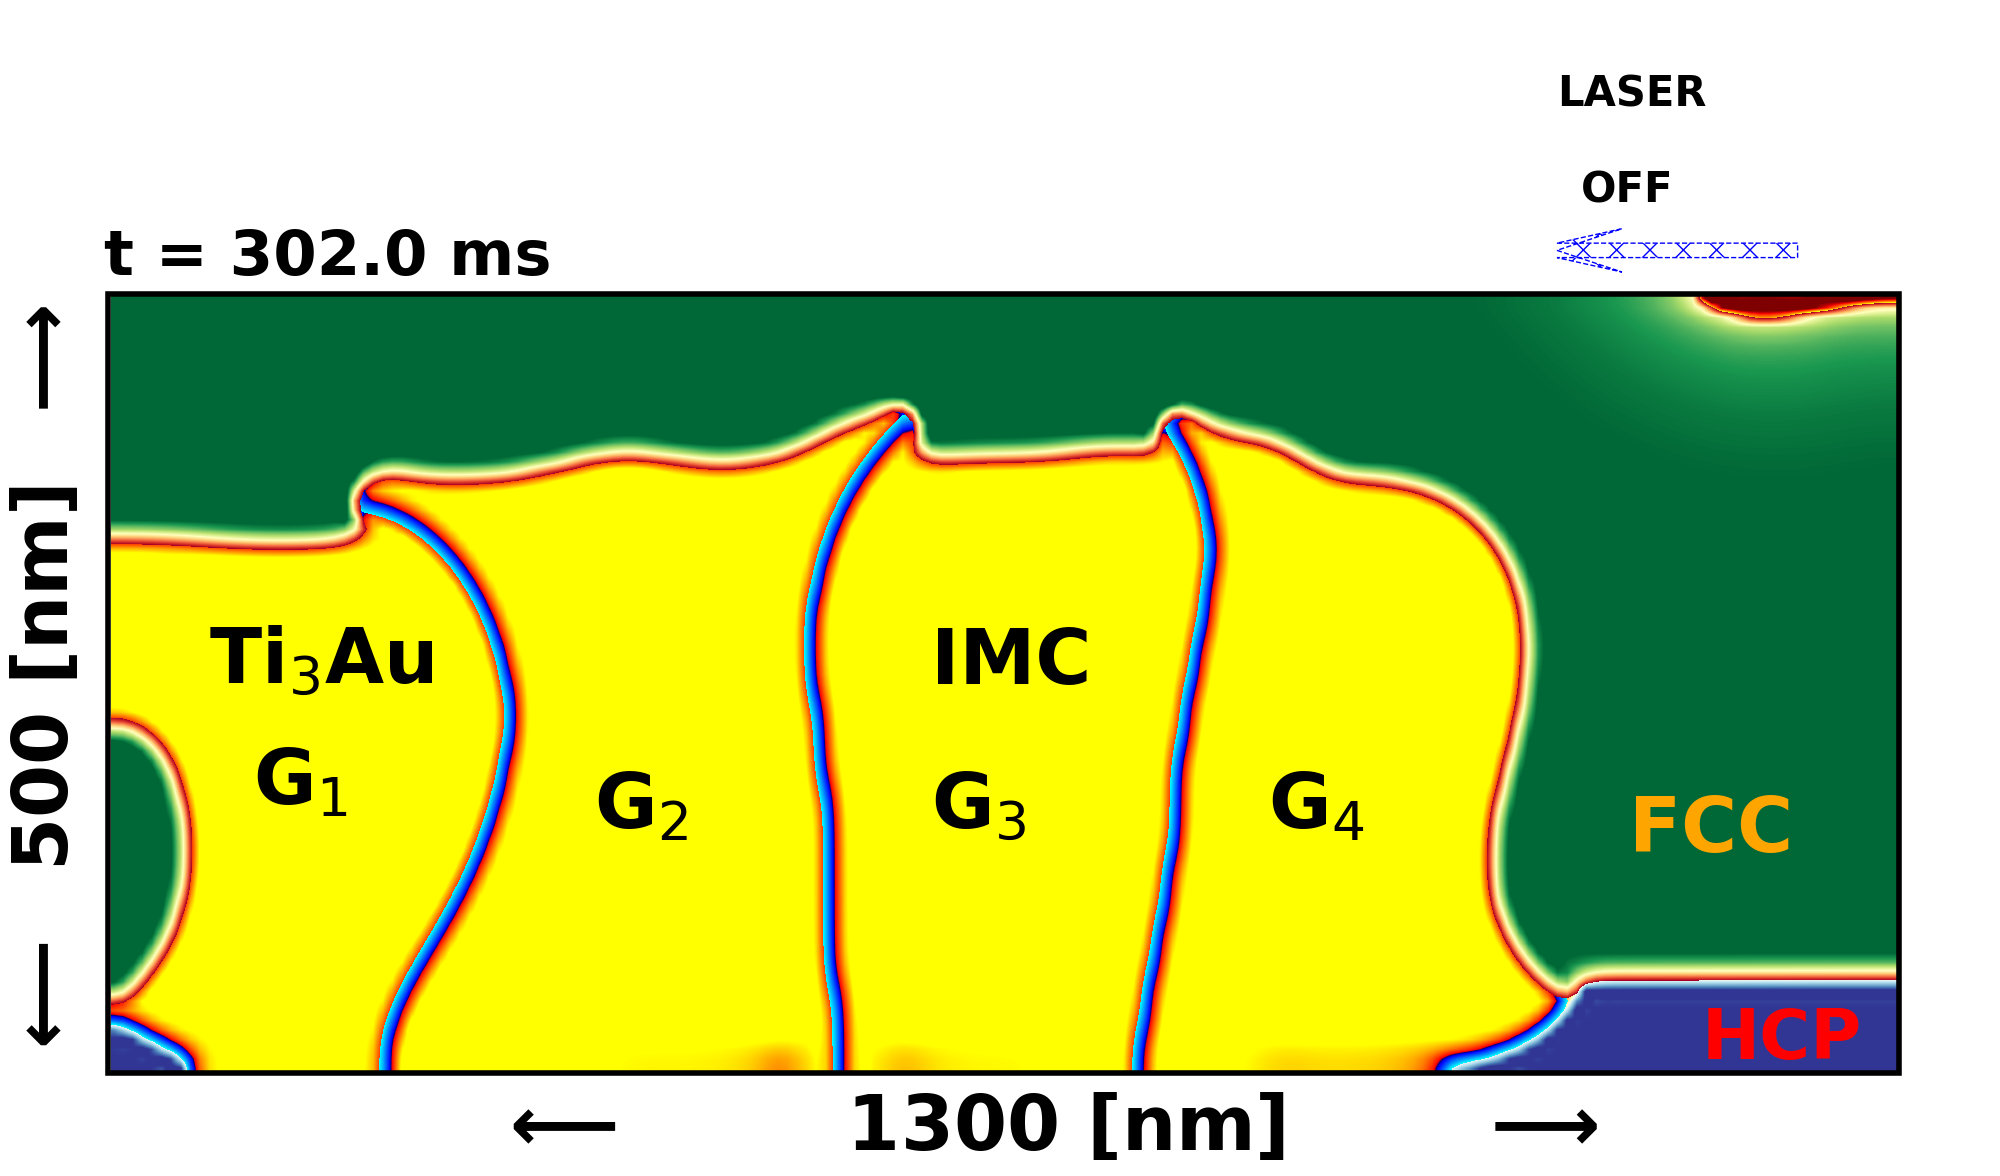

In [54]:
t_step = 1020
scan_speed = '5'  # micro meter per sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
max_temp_dt = max_temp_index[2]+mid_dt 

laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

## Finding the time step at which the specimen cools below melting temperature near the end of simulation  
total_time_steps = temp.shape[2]-1
dt_ = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 1337)

####################################################
fig, ax1 = plt.subplots(1,1, figsize=(20,12), frameon=True)
ax1.clear()
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)
####################################################
cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
Ti_txt = ax1.text(330, 158,'HCP', fontsize = 50, weight='bold', color='red')

cmap=cold2hot
cmap.set_under('white', alpha=0) 
hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
imc1txt = ax1.text(20, 80,'Ti$_3$Au', fontsize = 55, weight='bold')
imc1txt = ax1.text(29, 105,'G$_{1}$', fontsize = 55, weight='bold')
imc2txt = ax1.text(100,110,'G$_{2}$', fontsize = 55, weight='bold')
imc3txt = ax1.text(170,110,'G$_{3}$', fontsize = 55, weight='bold')
imc3txt = ax1.text(170,80,'IMC', fontsize = 55, weight='bold')
imc4txt = ax1.text(240,110,'G$_{4}$', fontsize = 55, weight='bold')

cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0)
hmap3 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
if t_step<20:
    meltpool_txt = ax1.text(max_temp_pos[1]-18,15,'LIQ', fontsize = 40, weight='bold', color='white')
elif t_step>1000:
    meltpool_txt = ax1.text(300,20,'LIQ', fontsize = 45, weight='bold', color='none')
else:
    meltpool_txt = ax1.text(meltpool_front[t_step]-45,15,'LIQ', fontsize = 40, weight='bold', color='white')

cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
hmap4 = ax1.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
AuSOL_txt = ax1.text(315,115,'FCC', fontsize = 55, weight='bold', color='orange')

######################### Laser Arrow ###########################
if max_temp_pos[1]<370 and t_step<1015:
    
    ax1.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='k', fontsize=35, weight='bold')
    ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
    
    if t_step <200:
        ax1.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax1.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=45, weight='bold')
    else:
        ax1.arrow(max_temp_pos[1]-90, -30, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax1.text(max_temp_pos[1]-90, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=45, weight='bold')
else:
    ax1.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax1.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax1.text(150+5,-10, irradiance, rotation=90, color='none', fontsize=35, weight='bold')
    ax1.arrow(150, -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)

    ax1.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=45, weight='bold')
    

ax1.set_ylim(162, -2)
ax1.set_xlim(-2,390)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=8, linestyles='dashdot')
clabels = plt.clabel(contour, inline=True, fontsize=35, colors='k', fmt='%1.0f K')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', fontsize = 55, weight ='bold', labelpad=10)
ax1.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.03, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 55, weight = 'bold',
             color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)
ax1.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))



plt.tight_layout()
# plt.savefig('figures/m1/all_phases_M1.png', format='png', dpi=800)
plt.show()

## Phase Animation

In [ ]:
## meltpool front calculated to put text "Au_LIQ" in animation at correct position
end_step = 1024
meltpool_front = leading_front(array=Au_LIQ, condition=0.85, end_time_step= end_step) 

def update_plot(t_steps, scan_speed, irradiance):
    plt.ioff()
    plt.cla()
    t_step = t_steps+1
    max_temp = round(temp[:,:,t_step].max())
    max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)


    mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
    max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
    max_temp_dt = max_temp_index[2]+mid_dt 
    laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

    ## Finding the time step at which the specimen cools below melting temperature near the end of simulation  
    total_time_steps = temp.shape[2]-1
    dt_ = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 1337)

    ###### Comment if only save animation | Uncomment if want to save individual frame image also
    fig, ax1 = plt.subplots(1,1, figsize=(20,12), frameon=True)
    ax1.clear()
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    
    max_temp = round(temp[:,:,t_step].max())
    max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)
    ####################################################
    cmap = plt.get_cmap('RdYlBu')
    cmap.set_under('white', alpha=0)
    hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
    Ti_txt = ax1.text(330, 158,'HCP', fontsize = 50, weight='bold', color='red')
    
    cmap=cold2hot
    cmap.set_under('white', alpha=0) 
    hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    imc1txt = ax1.text(20, 80,'Ti$_3$Au', fontsize = 55, weight='bold')
    imc1txt = ax1.text(29, 105,'G$_{1}$', fontsize = 55, weight='bold')
    imc2txt = ax1.text(100,110,'G$_{2}$', fontsize = 55, weight='bold')
    imc3txt = ax1.text(170,110,'G$_{3}$', fontsize = 55, weight='bold')
    imc3txt = ax1.text(170,80,'IMC', fontsize = 55, weight='bold')
    imc4txt = ax1.text(240,110,'G$_{4}$', fontsize = 55, weight='bold')
    
    cmap = plt.get_cmap('jet')
    cmap.set_under('white', alpha=0)
    hmap3 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    if t_step<20:
        meltpool_txt = ax1.text(max_temp_pos[1]-18,15,'LIQ', fontsize = 40, weight='bold', color='white')
    elif t_step>1000:
        meltpool_txt = ax1.text(300,20,'LIQ', fontsize = 45, weight='bold', color='none')
    else:
        meltpool_txt = ax1.text(meltpool_front[t_step]-45,15,'LIQ', fontsize = 40, weight='bold', color='white')
    
    cmap = plt.get_cmap('RdYlGn')
    cmap.set_under('white', alpha=0) 
    hmap4 = ax1.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
    AuSOL_txt = ax1.text(315,115,'FCC', fontsize = 55, weight='bold', color='orange')
    
    ######################### Laser Arrow ###########################
    if max_temp_pos[1]<370 and t_step<1015:
        
        ax1.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='k', fontsize=35, weight='bold')
        ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
        
        if t_step <200:
            ax1.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax1.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
            ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=45, weight='bold')
        else:
            ax1.arrow(max_temp_pos[1]-90, -30, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax1.text(max_temp_pos[1]-90, -37, s=f'{scan_speed} nm/ms', fontsize=30, weight = 'bold')
            ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=45, weight='bold')
    else:
        ax1.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax1.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax1.text(150+5,-10, irradiance, rotation=90, color='none', fontsize=35, weight='bold')
        ax1.arrow(150, -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)
    
        ax1.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=45, weight='bold')
        
    
    ax1.set_ylim(162, -2)
    ax1.set_xlim(-2,390)
    
    contour_levels = [450, 700,  1337]
    contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=8, linestyles='dashdot')
    clabels = plt.clabel(contour, inline=True, fontsize=35, colors='k', fmt='%1.0f K')
    
    ################## Dimensions ###################
    ax1.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', fontsize = 55, weight ='bold', labelpad=10)
    ax1.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.03, 0.5), rotation=90,
                 xycoords='axes fraction', textcoords='axes fraction', fontsize = 55, weight = 'bold',
                 color='k', ha='center', va='center')
    
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.spines[:].set_linewidth(0)
    ax1.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))

    plt.tight_layout()
    # plt.close() 


# t_steps = model.dimensions['time_step'].size-1
# t_steps = 1023
scan_speed = '5'
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

############ To save the image as well #############
# for time_step in range(t_steps):
for time_step in range(800, 1024, 1):
    update_plot(time_step, scan_speed, irradiance)
    plt.savefig(f'animation/m1/temporary_figures/phases/f_{time_step}.png', bbox_inches='tight', dpi=100)
    plt.close() 


## Temperature

### T-t diagram

In [62]:
x = time_ms[1:time_steps] 
point_1 = temp[0,30,1:time_steps]
point_2 = temp[0,130,1:time_steps]
point_3 = temp[0,230,1:time_steps]

In [63]:
def index_tracker(array, condition):
    return [index for index, element in enumerate(array) if element >= condition]

p1 = [index_tracker(point_1, 1337)[0], index_tracker(point_1, 1337)[-1]]
p2 = [index_tracker(point_2, 1337)[0], index_tracker(point_2, 1337)[-1]]
p3 = [index_tracker(point_3, 1337)[0], index_tracker(point_3, 1337)[-1]]

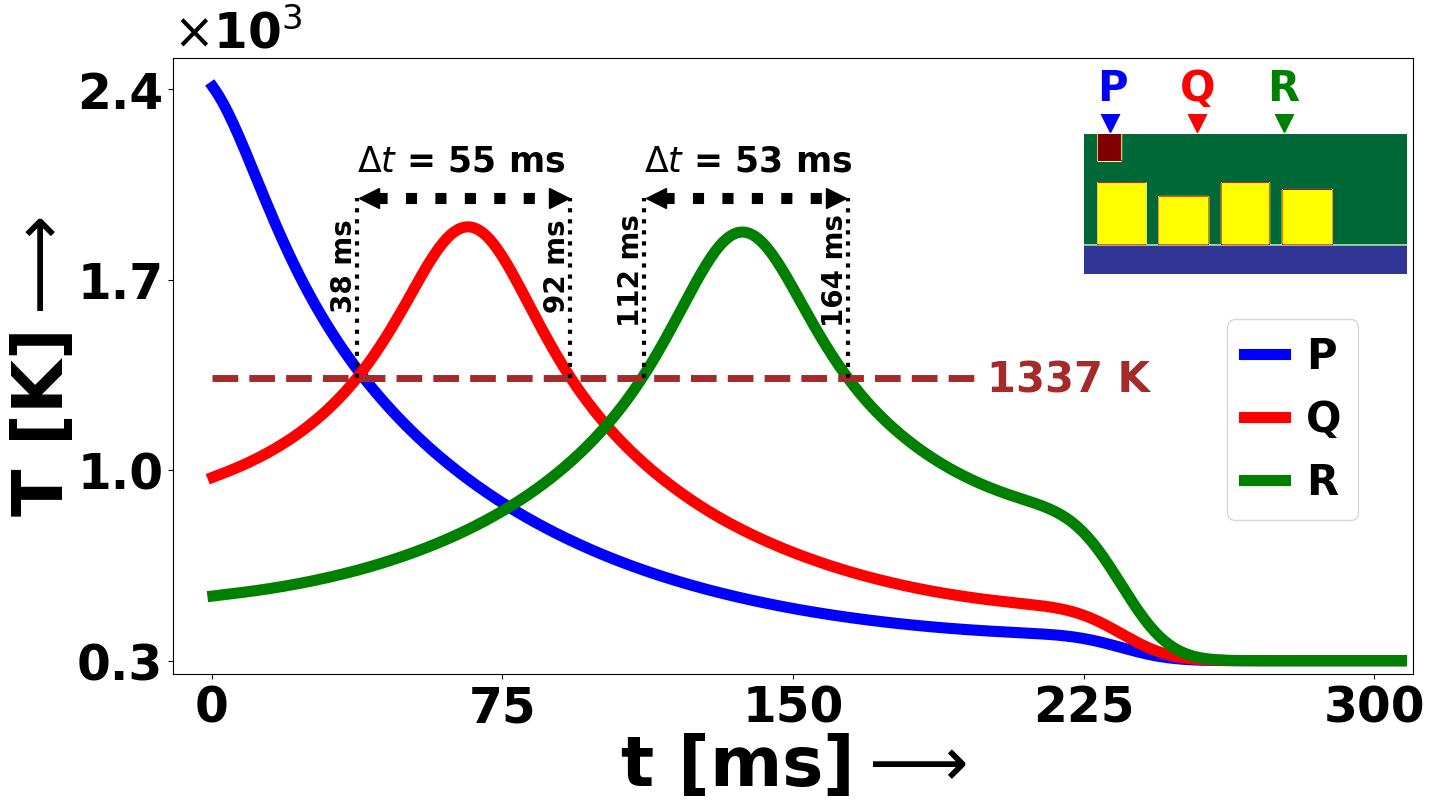

In [10]:
fig, ax3 = plt.subplots(1, 1, figsize=[16, 8])
ax3.plot(x, point_1, linewidth=8, linestyle='-', color = 'blue', label ='P')
ax3.plot(x, point_2, linewidth=8, linestyle='-', color='red', label='Q')
ax3.plot(x, point_3, linewidth=8, linestyle='-', color='green', label='R')
ax3.set_ylabel(r"T [K]$ \longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=50, color='k')
ax3.set_xlabel(r"t [ms]$ \longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=50, color='k')
# ax3.set_xlabel(r"$\Delta$ t", weight = 'bold', size=25, color='m')
ax3.set_xticks([0, 75, 150, 225, 300], labels=['0', '75', '150', '225', '300'], size=35, color='k')

# ax3.set_yticks(label =[1000,2000], labels=['1', '2'], size=15, color='yellow')

ax3.yaxis.set_tick_params(labelcolor='red', labelsize=17) 
ax3.set_yticks([300, 1000, 1700, 2400], labels=['0.3', '1.0', '1.7', '2.4',], size=35, color='k' )
ax3.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=35, weight='bold')
# ax3.get_yaxis().get_offset_text().set_position((-0.07, 0))
# ax3.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)
# ax3.yaxis.offsetText.set(size=20, weight='bold', color='red')
# ax3.yaxis.set_major_locator(plt.MaxNLocator(3))
ax3.set_ylim(bottom=250)
ax3.set_xlim(-10, 310)

for label in ax3.get_xticklabels(): label.set_fontweight('bold')
for label in ax3.get_yticklabels(): label.set_fontweight('bold')
legend = ax3.legend(loc=(0.85, 0.25), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'30',}, handletextpad=0.5, handlelength=1.0,   frameon=True).get_frame().set_facecolor('none')

# ax3.plot([0, 700], [round(point_1[0]), round(point_1[0])], color='black', linestyle='--',)
# ax3.text(150,round(point_1[0])-100, f"{round(point_1[0])} K", rotation=0, color='black', fontsize=12, weight='bold',  backgroundcolor='white')

ax3.hlines(y=1337, xmin=0, xmax=240, color='brown', linestyle='--', linewidth=5)
ax3.text(200, 1337-50, f"{1337} K", rotation=0, color='brown', fontsize=30, weight='bold', backgroundcolor='white',)

# ax3.vlines(x=x[p1[0]], ymin=1337, ymax=2000,  linewidth=3, color='k', linestyle=':')
# ax3.vlines(x=x[p1[1]], ymin=1337, ymax=2000,  linewidth=3, color='k', linestyle=':')
# ax3.text(x=x[p1[0]]+11, y=2100, s=f'{x[p1[1]]-x[p1[0]]:.0f} ms', fontsize=30, weight='bold')
# ax3.hlines(y=2000, xmin=x[p1[0]]+5, xmax=x[p1[1]]-5, linewidth=8, color='k', linestyle=':')
# ax3.plot(x[p1[0]]+3,  2000, marker='<', color='black', markersize=15)
# ax3.plot(x[p1[1]]-3,  2000, marker='>', color='black', markersize=15)
# ax3.text(x=x[p2[0]]-7, y=1600, s=f'{x[p2[0]]:.0f} ms', fontsize=20, weight='bold', rotation=90)
# ax3.text(x=x[p2[1]]-7, y=1600, s=f'{x[p2[1]]:.0f} ms', fontsize=20, weight='bold', rotation=90)


ax3.vlines(x=x[p2[0]], ymin=1337, ymax=2000,  linewidth=3, color='k', linestyle=':')
ax3.vlines(x=x[p2[1]], ymin=1337, ymax=2000,  linewidth=3, color='k', linestyle=':')
ax3.text(x=x[p2[0]], y=2100, s=f'$\Delta t$ = {x[p2[1]]-x[p2[0]]:.0f} ms', fontsize=25, weight='bold')
ax3.hlines(y=2000, xmin=x[p2[0]]+5, xmax=x[p2[1]]-5, linewidth=8, color='k', linestyle=':')
ax3.plot(x[p2[0]]+3,  2000, marker='<', color='black', markersize=15)
ax3.plot(x[p2[1]]-3,  2000, marker='>', color='black', markersize=15)
ax3.text(x=x[p2[0]]-7, y=1600, s=f'{x[p2[0]]:.0f} ms', fontsize=20, weight='bold', rotation=90)
ax3.text(x=x[p2[1]]-7, y=1600, s=f'{x[p2[1]]:.0f} ms', fontsize=20, weight='bold', rotation=90)


ax3.vlines(x=x[p3[0]], ymin=1337, ymax=2000,  linewidth=3, color='k', linestyle=':')
ax3.vlines(x=x[p3[1]], ymin=1337, ymax=2000,  linewidth=3, color='k', linestyle=':')
ax3.text(x=x[p3[0]], y=2100, s=f'$\Delta t$ = {x[p3[1]]-x[p3[0]]:.0f} ms', fontsize=25, weight='bold')
ax3.hlines(y=2000, xmin=x[p3[0]]+5, xmax=x[p3[1]]-5, linewidth=8, color='k', linestyle=':')
ax3.plot(x[p3[0]]+3,  2000, marker='<', color='black', markersize=15)
ax3.plot(x[p3[1]]-3,  2000, marker='>', color='black', markersize=15)
ax3.text(x=x[p3[0]]-7, y=1550, s=f'{x[p3[0]]:.0f} ms', fontsize=20, weight='bold', rotation=90)
ax3.text(x=x[p3[1]]-7, y=1550, s=f'{x[p3[1]]:.0f} ms', fontsize=20, weight='bold', rotation=90)

ax4 = fig.add_axes([0.67, 0.61, 0.25, 0.20], frameon=False)  # [left, bottom, width, height]
ax4.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False,)

t_step=0
cmap1 = plt.get_cmap('RdYlBu')
cmap2 = cold2hot
cmap3 = plt.get_cmap('jet')
cmap4 = plt.get_cmap('RdYlGn')
cmap1.set_under('white', alpha=0)
cmap2.set_under('white', alpha=0)
cmap3.set_under('white', alpha=0)
cmap4.set_under('white', alpha=0)
hmap1 = ax4.imshow(Ti[:,:,t_step], cmap=cmap1, vmin=0.3, vmax=1.0, interpolation='bilinear')
hmap21 = ax4.imshow(IMC1[:,:,t_step], cmap=cmap2, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax4.imshow(IMC2[:,:,t_step], cmap=cmap2, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax4.imshow(IMC3[:,:,t_step], cmap=cmap2, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax4.imshow(IMC4[:,:,t_step], cmap=cmap2, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap3 = ax4.imshow(Au_LIQ[:,:,t_step], cmap=cmap3, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap4 = ax4.imshow(Au_SOL[:,:,t_step], cmap=cmap4, vmin=0.3, vmax=0.9, interpolation='bilinear')

########### Points P and Q ######################
ax4.plot(30,  -15, marker='v', color='blue', markersize=15) ## Point P is selected to be the point where laser hits the material
ax4.text(15,  -40, "P", rotation=0, color='blue', fontsize=30, weight='bold')
ax4.plot(130, -15, marker='v', color='red', markersize=15)  # random point Q which is 100 distance far away from point P 
ax4.text(110, -40, "Q", rotation=0, color='red', fontsize=30, weight='bold')
ax4.plot(230, -15, marker='v', color='green', markersize=15)  # random point R which is 100 distance far away from point Q
ax4.text(210, -40, "R", rotation=0, color='green', fontsize=30, weight='bold')

# plt.savefig('figures/m1/Temperature_time_M1.png', bbox_inches='tight', dpi=800)

plt.show()

### Temperature Distribution

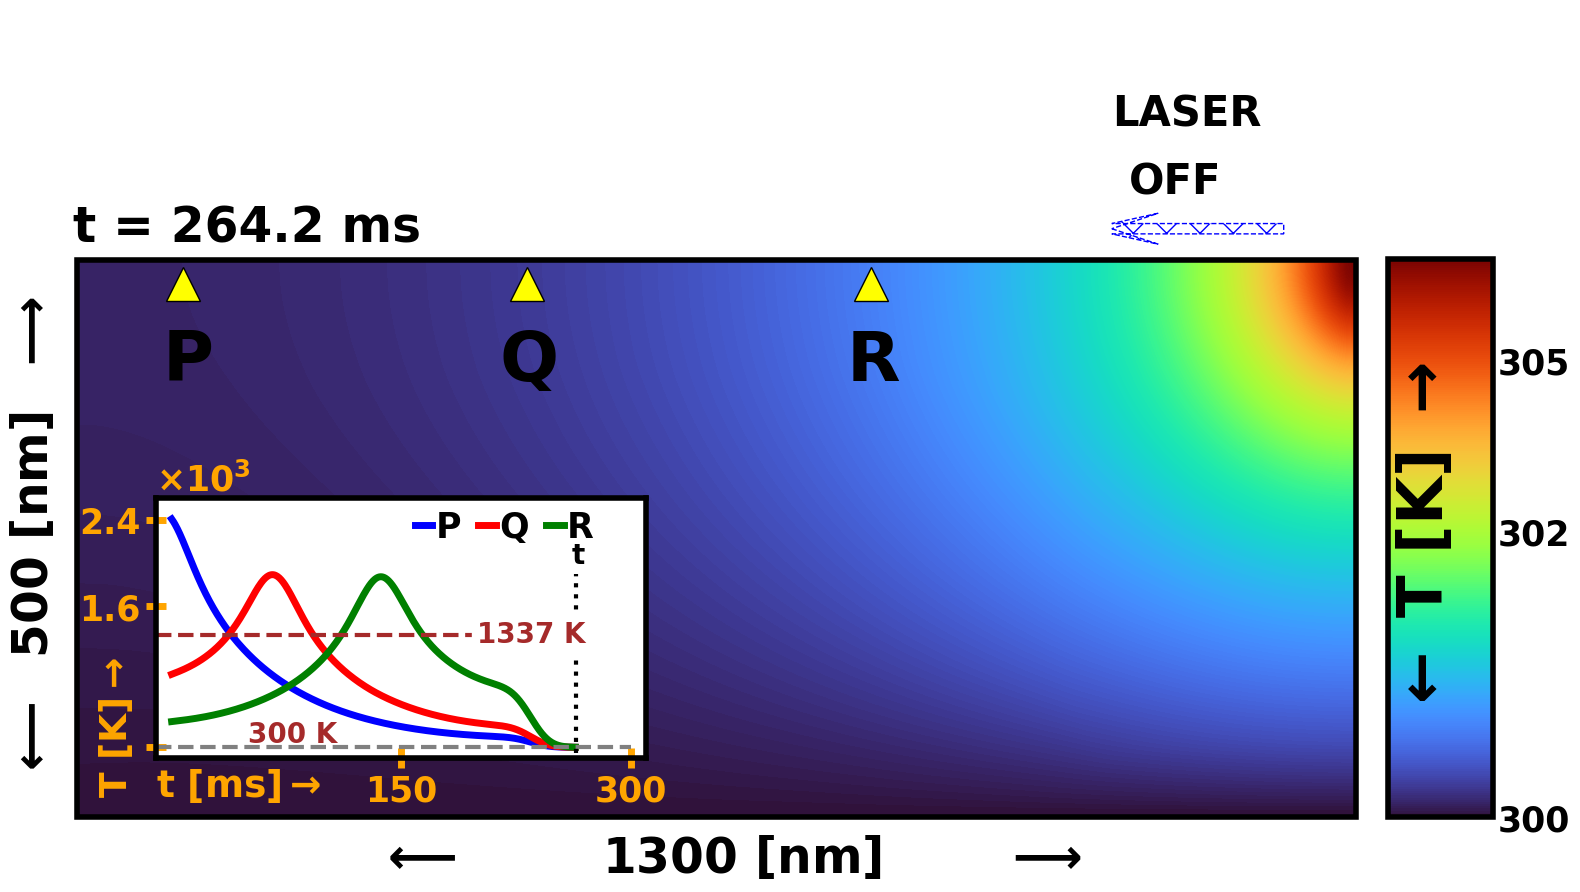

In [91]:
t_step = 974
if t_step>975:
    t_step=975
    
time_steps= t_step

scan_speed = '5' # nano meter per micro sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
max_temp_dt = max_temp_index[2]+mid_dt 

laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)
####################################################

# x = np.arange(time_steps-1)
x = time_ms[1:time_steps] 
point_1 = temp[0,30, 1:time_steps]
point_2 = temp[0,130, 1:time_steps]
point_3 = temp[0,230, 1:time_steps]

fig, ax1 = plt.subplots(1, 1, figsize=[14, 10], frameon=True)
ax1.set_facecolor((0, 0, 0, 0)) #figsize=[8, 10])
# hmap1 = ax1.imshow(temp[:,:,t_step], vmin=scale_min, vmax=scale_max, cmap='gist_ncar', interpolation='bilinear')
hmap1 = ax1.imshow(temp[:,:,t_step], cmap='turbo', interpolation='bilinear')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

############### Arrow #########################
# if t_step<=max_temp_dt:
if max_temp_pos[1]<370:
    ax1.text(max_temp_pos[1]-30, -10, irradiance, rotation=90, color='k', fontsize=35, weight='bold')
    ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
    
    if t_step <200:
        ax1.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax1.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=35, weight='bold')
    else:
        ax1.arrow(max_temp_pos[1]-95, -30, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax1.text(max_temp_pos[1]-95, -37, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
else:
    ax1.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax1.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax1.text(max_temp_pos[1]-30,-10, irradiance, rotation=90, color='none', fontsize=35, weight='bold')
    ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)

    ax1.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')

ax1.set_ylim(162, -2)
ax1.set_xlim(-2,380)

ax1.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', fontsize = 35, weight ='bold', labelpad=10)
ax1.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.03, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 35, weight = 'bold',
             color='k', ha='center', va='center')

contour_levels = [450, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

############## Color Bar ###########
ax2 = fig.add_axes([0.99, 0.176, 0.075, 0.558])
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='k',  labelpad=-125, fontsize=45, rotation=90, weight='bold')

if max_temp >=1450:
    cbar.set_ticks([300+50, 850, 1337, max_temp-50], labels=['300', '850', '1337',  f'{max_temp}'], weight='bold') 
elif 1450>max_temp>1337:
    cbar.set_ticks([300+25, (max_temp+300)/2, max_temp-25], labels=['300', f'{int((max_temp+300)/2)}', f'{max_temp}'], weight='bold')
elif 1337>=max_temp>800:
    cbar.set_ticks([300+5, (max_temp+300)/2, max_temp-5], labels=['300', f'{int((max_temp+300)/2)}', f'{max_temp}'], weight='bold')
elif 800>=max_temp>550:
    cbar.set_ticks([300+5, (max_temp+300)/2, max_temp-5], labels=['300', f'{int((max_temp+300)/2)}', f'{max_temp}'], weight='bold')
elif 550>=max_temp>=305:
    cbar.set_ticks([300, (max_temp+300)/2, max_temp-1.0], labels=[f'{300:.0f}', f'{int((max_temp+300)/2)}',f'{max_temp}'], weight='bold')

########## Points P and Q ######################
ax1.plot(30,  6.0, marker='^', color='yellow', mec='k',  markersize=25) ## Point P is selected to be the point where laser hits the material
ax1.text(24,  34, "P", rotation=0, color='k', fontsize=50, weight='bold')
ax1.plot(130, 6.0, marker='^', color='yellow', mec='k',  markersize=25)  # random point Q which is 100 distance far away from point P 
ax1.text(122, 34, "Q", rotation=0, color='k', fontsize=50, weight='bold')
ax1.plot(230, 6.0, marker='^', color='yellow', mec='k',  markersize=25)  # random point R which is 100 distance far away from point Q
ax1.text(223, 34, "R", rotation=0, color='k', fontsize=50, weight='bold')

################################################
ax3 = fig.add_axes([0.60, 0.235, 0.35, 0.26])  # [left, bottom, width, height]
if t_step >= 100:  # Change position of ax2 at t = 10
    ax3.set_position([0.11, 0.235, 0.35, 0.26])
    ax1.text(5, 153, r"T [K]$\mathbf{\rightarrow}$", rotation=90, color='orange', fontsize=27, weight='bold',)
    ax1.text(22, 155, r"t [ms]$\mathbf{\rightarrow}$", rotation=0, color='orange', fontsize=27, weight='bold',)
else:
    ax1.text(206, 153, r"T [K]$\mathbf{\rightarrow}$", rotation=90, color='orange', fontsize=27, weight='bold',)
    ax1.text(220, 155, r"t [ms]$\mathbf{\rightarrow}$", rotation=0, color='orange', fontsize=27, weight='bold',)

ax3.plot(x, point_1, linewidth=5, color = 'blue', label ='P')
ax3.plot(x, point_2, linewidth=5, linestyle='-', color='red', label='Q')
ax3.plot(x, point_3, linewidth=5, linestyle='-', color='green', label='R')
ax3.set_xticks([ 150, 300], labels=['150', '300'], size=25, color='orange')
ax3.yaxis.set_tick_params(labelcolor='red', labelsize=17) 
ax3.set_yticks([300, 1600, 2400], labels=[' ', '1.6', '2.4',], size=25, color='orange' )
ax3.set_title(r'$\mathbf{\times10^3}$', pad=0, loc='left', color='orange', fontsize=25, weight='bold')

ax3.set_ylim(200,2600)
ax3.set_xlim(-10, 310)

for label in ax3.get_xticklabels(): label.set_fontweight('bold')
for label in ax3.get_yticklabels(): label.set_fontweight('bold')
legend = ax3.legend(loc=(0.50, 0.77), ncol=3,  columnspacing=0.5, prop={'weight':'bold', 'size':'25',}, handletextpad=0.1, handlelength=0.5,   frameon=False).get_frame().set_facecolor('none')

ax3.hlines(y=1337, xmin=-10, xmax=240, color='brown',  linewidth=3, linestyle='--',)
ax3.text(200,1337-70, f"{1337} K", rotation=0, color='brown', fontsize=20, weight='bold', backgroundcolor='white',)

ax3.hlines(y=300, xmin=-10, xmax=300, color='gray',  linewidth=3, linestyle='--',)
ax3.text(50, 350, f"{300} K", rotation=0, color='brown', fontsize=20, weight='bold',)# backgroundcolor='white',)

t_point = time_ms[1:t_step+1]
ax3.vlines(x=t_point[-1], ymin=250, ymax=1900, linestyle='dotted', linewidth=3, color='k')
ax3.text(t_point[-1]-3, 2000, f't', rotation=0, color='k', fontsize=20, weight='bold',)

ax3.tick_params(axis='y', direction='inout', which='both', color='orange', length=15, width=5)
ax3.tick_params(axis='x', direction='inout', which='both', color='orange', length=15, width=5)

ax1.spines[:].set_linewidth(0)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
ax3.spines[:].set_linewidth(4)
ax3.spines[:].set_color('k')

ax1.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))


plt.tight_layout()
# plt.savefig('figures/m2/temperature_M2.png', bbox_inches='tight', dpi=800)
plt.show()

## Temperature Animation

In [98]:
def update_plot(t_steps, scan_speed, irradiance):
    t_step = t_steps+1
    max_temp = round(temp[:,:,t_step].max())
    max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)
    
    mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
    max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
    max_temp_dt = max_temp_index[2]+mid_dt 
    
    laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

    # x = np.arange(t_step)
    x = time_ms[1:t_step+1] 
    point_1 = temp[0,30,1:t_step+1]
    point_2 = temp[0,130,1:t_step+1]
    point_3 = temp[0,230,1:t_step+1]

    fig, ax1 = plt.subplots(1, 1, figsize=[14, 10], frameon=True)
    ax1.set_facecolor((0, 0, 0, 0)) #figsize=[8, 10])
    # hmap1 = ax1.imshow(temp[:,:,t_step], vmin=scale_min, vmax=scale_max, cmap='gist_ncar', interpolation='bilinear')
    hmap1 = ax1.imshow(temp[:,:,t_step], cmap='turbo', interpolation='bilinear')
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    
    ############### Arrow #########################
    # if t_step<=max_temp_dt:
    if max_temp_pos[1]<370:
        ax1.text(max_temp_pos[1]-30, -10, irradiance, rotation=90, color='k', fontsize=35, weight='bold')
        ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
        
        if t_step <200:
            ax1.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax1.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
            ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=35, weight='bold')
        else:
            ax1.arrow(max_temp_pos[1]-95, -30, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax1.text(max_temp_pos[1]-95, -37, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
            ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
    else:
        ax1.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax1.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax1.text(max_temp_pos[1]-30,-10, irradiance, rotation=90, color='none', fontsize=35, weight='bold')
        ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)
    
        ax1.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
    
    ax1.set_ylim(162, -2)
    ax1.set_xlim(-2,380)
    
    ax1.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', fontsize = 35, weight ='bold', labelpad=10)
    ax1.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.03, 0.5), rotation=90,
                 xycoords='axes fraction', textcoords='axes fraction', fontsize = 35, weight = 'bold',
                 color='k', ha='center', va='center')
    
    contour_levels = [450, 700,  1337]
    contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
    clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
    for label in clabels: label.set_fontweight('bold')
    
    ############## Color Bar ###########
    ax2 = fig.add_axes([0.99, 0.176, 0.075, 0.558])
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='k',  labelpad=-125, fontsize=45, rotation=90, weight='bold')
    
    if max_temp >=1450:
        cbar.set_ticks([300+50, 850, 1337, max_temp-50], labels=['300', '850', '1337',  f'{max_temp}'], weight='bold') 
    elif 1450>max_temp>1337:
        cbar.set_ticks([300+25, (max_temp+300)/2, max_temp-25], labels=['300', f'{int((max_temp+300)/2)}', f'{max_temp}'], weight='bold')
    elif 1337>=max_temp>800:
        cbar.set_ticks([300+5, (max_temp+300)/2, max_temp-5], labels=['300', f'{int((max_temp+300)/2)}', f'{max_temp}'], weight='bold')
    elif 800>=max_temp>550:
        cbar.set_ticks([300+5, (max_temp+300)/2, max_temp-5], labels=['300', f'{int((max_temp+300)/2)}', f'{max_temp}'], weight='bold')
    elif 550>=max_temp>=305:
        cbar.set_ticks([300, (max_temp+300)/2, max_temp-1.0], labels=[f'{300:.0f}', f'{int((max_temp+300)/2)}',f'{max_temp}'], weight='bold')
    
    ########## Points P and Q ######################
    ax1.plot(30,  6.0, marker='^', color='yellow', mec='k',  markersize=25) ## Point P is selected to be the point where laser hits the material
    ax1.text(24,  34, "P", rotation=0, color='k', fontsize=50, weight='bold')
    ax1.plot(130, 6.0, marker='^', color='yellow', mec='k',  markersize=25)  # random point Q which is 100 distance far away from point P 
    ax1.text(122, 34, "Q", rotation=0, color='k', fontsize=50, weight='bold')
    ax1.plot(230, 6.0, marker='^', color='yellow', mec='k',  markersize=25)  # random point R which is 100 distance far away from point Q
    ax1.text(223, 34, "R", rotation=0, color='k', fontsize=50, weight='bold')
    
    ################################################
    ax3 = fig.add_axes([0.60, 0.235, 0.35, 0.26])  # [left, bottom, width, height]
    if t_step >= 100:  # Change position of ax2 at t = 10
        ax3.set_position([0.11, 0.235, 0.35, 0.26])
        ax1.text(5, 153, r"T [K]$\mathbf{\rightarrow}$", rotation=90, color='orange', fontsize=27, weight='bold',)
        ax1.text(22, 155, r"t [ms]$\mathbf{\rightarrow}$", rotation=0, color='orange', fontsize=27, weight='bold',)
    else:
        ax1.text(206, 153, r"T [K]$\mathbf{\rightarrow}$", rotation=90, color='orange', fontsize=27, weight='bold',)
        ax1.text(220, 155, r"t [ms]$\mathbf{\rightarrow}$", rotation=0, color='orange', fontsize=27, weight='bold',)
    
    ax3.plot(x, point_1, linewidth=5, color = 'blue', label ='P')
    ax3.plot(x, point_2, linewidth=5, linestyle='-', color='red', label='Q')
    ax3.plot(x, point_3, linewidth=5, linestyle='-', color='green', label='R')
    ax3.set_xticks([ 150, 300], labels=['150', '300'], size=25, color='orange')
    ax3.yaxis.set_tick_params(labelcolor='red', labelsize=17) 
    ax3.set_yticks([300, 1600, 2400], labels=[' ', '1.6', '2.4',], size=25, color='orange' )
    ax3.set_title(r'$\mathbf{\times10^3}$', pad=0, loc='left', color='orange', fontsize=25, weight='bold')
    
    ax3.set_ylim(200,2600)
    ax3.set_xlim(-10, 310)
    
    for label in ax3.get_xticklabels(): label.set_fontweight('bold')
    for label in ax3.get_yticklabels(): label.set_fontweight('bold')
    legend = ax3.legend(loc=(0.50, 0.77), ncol=3,  columnspacing=0.5, prop={'weight':'bold', 'size':'25',}, handletextpad=0.1, handlelength=0.5,   frameon=False).get_frame().set_facecolor('none')
    
    ax3.hlines(y=1337, xmin=-10, xmax=240, color='brown',  linewidth=3, linestyle='--',)
    ax3.text(200,1337-70, f"{1337} K", rotation=0, color='brown', fontsize=20, weight='bold', backgroundcolor='white',)
    
    ax3.hlines(y=300, xmin=-10, xmax=300, color='gray',  linewidth=3, linestyle='--',)
    ax3.text(50, 350, f"{300} K", rotation=0, color='brown', fontsize=20, weight='bold',)# backgroundcolor='white',)
    
    t_point = time_ms[1:t_step+1]
    ax3.vlines(x=t_point[-1], ymin=250, ymax=1900, linestyle='dotted', linewidth=3, color='k')
    ax3.text(t_point[-1]-3, 2000, f't', rotation=0, color='k', fontsize=20, weight='bold',)
    
    ax3.tick_params(axis='y', direction='inout', which='both', color='orange', length=15, width=5)
    ax3.tick_params(axis='x', direction='inout', which='both', color='orange', length=15, width=5)
    
    ax1.spines[:].set_linewidth(0)
    ax1.spines[:].set_color('k')
    ax2.spines[:].set_linewidth(4)
    ax3.spines[:].set_linewidth(4)
    ax3.spines[:].set_color('k')
    
    ax1.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))


    plt.tight_layout()


total_time_steps = temp.shape[2]-1
# t_steps = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 304) #for t_step with temp greater than 304 in specimen
t_steps = 973
scan_speed = '5'
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

############ To save the image as well #############
for time_step in range(900, 974, 1):
    # for time_step in range(t_steps):
    update_plot(time_step, scan_speed, irradiance)
    plt.savefig(f'animation/m1/temporary_figures/temperature/f_{time_step}.png', bbox_inches='tight', dpi=100)
    plt.close() 

# subprocess.call(['ffmpeg', '-y', '-framerate', '10', '-i', 'animation/temporary_figures/temperature/f_%d.png', '-c:v', 'libx264', '-r', '30', '-s', '1920x1080', '-pix_fmt', 'yuv420p', 'animation/Temperature Distribution.mp4'])


## LeadLag

### Fitting the gap

In [6]:
def leading_front(array, condition, end_time_step):
    condition = condition
    end_step = end_time_step
    leading_front = []
    for t in range(end_step):
        A = array[0:1,:,t][0]
        for i in range(len(A)-1,0,-1):
            if A[i]>=condition:
                # print(i)
                break
        leading_front.append(i)
    return leading_front

end_step= 801 ## Find by plotting leading_temperature and leading_LIQ graph
# end_step = next(t-1 for t in range(1, temp.shape[2], 1) if np.max(temp[0:1, :, t]) < 1337)  ## End times for lead lag is that at which temperature of block reduces below melting (1337)
# end_step = next(t for t in range(1, Au_LIQ.shape[2], 1) if np.max(Au_LIQ[0:1, 370:, t]) >= 0.85)  ## End times for lead lag is that at which meltpool of block reaches the right end of the specimen


leading_temperature = leading_front(array=temp[:,:,:end_step], condition=1337, end_time_step=end_step)
leading_LIQ = leading_front(array=Au_LIQ[:,:,:end_step], condition=0.85, end_time_step= end_step)
time_duration = np.arange(end_step)
time_lead_lag =  real_time[:end_step]

In [7]:
def fit_real_time(data, order):
    position, time_lead_lag = data
    coefficients_real = np.polyfit(position, time_lead_lag, order)
    fitted_real_time = np.poly1d(coefficients_real)
    return fitted_real_time

def fit_dt(data, order):
    position, dt = data
    coefficients_dt = np.polyfit(position, dt, order)
    fitted_dt = np.poly1d(coefficients_dt)
    return fitted_dt


common_position = leading_LIQ.index(94) # = 36 ## => comes from nearest value of starting point of leading temp i.e. => leading_temperature[1]
phase_fit_real_time = fit_real_time([leading_LIQ[1:], time_lead_lag[1:]], 15)
phase_fit_dt = fit_dt([leading_LIQ[1:], time_duration[1:]], 15)

temp_fit_real_time = fit_real_time([leading_temperature[1:], time_lead_lag[1:]], 15)
temp_fit_dt = fit_dt([leading_temperature[1:], time_duration[1:]], 15)

/tmp/ipykernel_20090/3062831903.py:3: RankWarning: Polyfit may be poorly conditioned
  coefficients_real = np.polyfit(position, time_lead_lag, order)
/tmp/ipykernel_20090/3062831903.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients_dt = np.polyfit(position, dt, order)


In [8]:
## xdim => 1300 nm = 371 units
## y dim => 500 nm = 161 units

T_end_dt = leading_temperature.index(370) # dt at which thermal front reach end of specimen 
T_slope0_dt = 760 # dt at which thermal front's slope is flat, and no change in time occurs as it has reached end of specimen (find by trial)

lag_time = []
for t in range(end_step):
    if t>=T_slope0_dt:
        lag_time.append(phase_fit_real_time(leading_LIQ[t]) - temp_fit_real_time(leading_LIQ[T_slope0_dt]))
    else:
        lag_time.append(phase_fit_real_time(leading_LIQ[t]) - temp_fit_real_time(leading_LIQ[t]))

# space_lag = np.array(leading_temperature)-np.array(leading_LIQ)

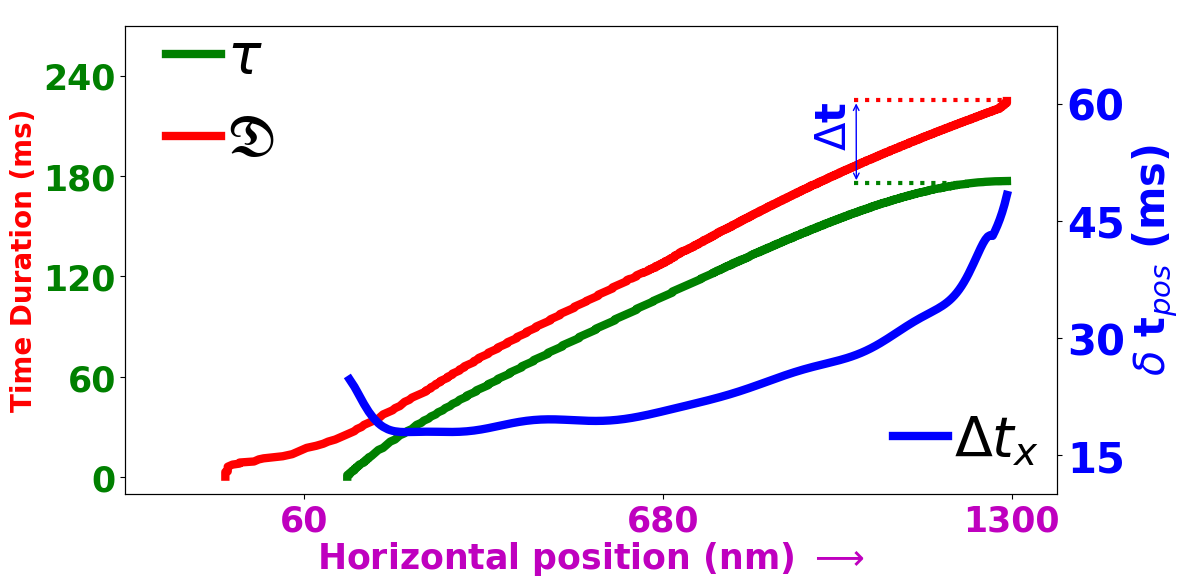

In [9]:
t_step = 800


fig, (ax1) = plt.subplots(1, 1, figsize=(12,6))

if t_step>=T_end_dt:
    ax1.plot(leading_temperature[1:T_end_dt], time_lead_lag[1:T_end_dt], marker='o', c='green',markersize=1, linewidth=6, label =r'$\tau$')
else:
    ax1.plot(leading_temperature[1:t_step], time_lead_lag[1:t_step], marker='o', c='green',markersize=1, linewidth=6, label =r'$\tau$')
    
ax1.plot(leading_LIQ[1:t_step], time_lead_lag[1:t_step], marker='.', c='red',markersize=1,linewidth=6, label =r'$\mathfrak{D}$')

ax1.set_ylabel("Time Duration (ms)",  weight = 'bold', size=20,  color='red')
ax1.set_xlabel(r"Horizontal position (nm) $\longrightarrow$", weight='bold', size=25, color='m', labelpad=1, ha='center')
ax1.set_xticks([75, 225, 371], labels=['60', '680', '1300'], size=25, color='m', weight='bold')
ax1.yaxis.set_tick_params(labelcolor='green', labelsize=25, pad=3,)
for label in ax1.get_yticklabels(): label.set_fontweight('bold')

if t_step>=common_position:
    ax1.hlines(y=phase_fit_real_time(leading_LIQ[t_step]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linewidth=3, linestyle=':', color='red')
    if t_step>=T_slope0_dt:
        ax1.hlines(y=temp_fit_real_time(leading_LIQ[T_slope0_dt]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65,  linewidth=3, linestyle=':', color='green')
        # ax1.vlines(x=leading_LIQ[t_step],  ymin=temp_fit_real_time(leading_LIQ[T_slope0_dt])+1, ymax=phase_fit_real_time(leading_LIQ[t_step]), linestyle='-', color='k', linewidth=2)
        ax1.text(x=leading_LIQ[t_step]-82, y= np.mean([phase_fit_real_time(leading_LIQ[t_step]), temp_fit_real_time(leading_LIQ[T_slope0_dt])]), s=r"$\Delta$t", color='blue', fontsize=30, rotation=90, weight='bold')
        ax1.annotate(text=' ', xy=(leading_LIQ[t_step]-65+1,temp_fit_real_time(leading_LIQ[T_slope0_dt])), xytext=(leading_LIQ[t_step]-65,phase_fit_real_time(leading_LIQ[t_step])+3), arrowprops=dict(arrowstyle='<->', color='blue'), )
    else:
        ax1.hlines(y=temp_fit_real_time(leading_LIQ[t_step]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linewidth=3, linestyle=':', color='green')
        # ax1.vlines(x=leading_LIQ[t_step],  ymin=temp_fit_real_time(leading_LIQ[t_step])+1, ymax=phase_fit_real_time(leading_LIQ[t_step]), linestyle='-', color='k', linewidth=2)
        ax1.text(x=leading_LIQ[t_step]-82, y=np.mean([phase_fit_real_time(leading_LIQ[t_step]), temp_fit_real_time(leading_LIQ[t_step])]), s=r"$\Delta$t", color='blue', fontsize=30, rotation=90, weight='bold')
        ax1.annotate(text=' ', xy=(leading_LIQ[t_step]-65+1, temp_fit_real_time(leading_LIQ[t_step])), xytext=(leading_LIQ[t_step]-65,phase_fit_real_time(leading_LIQ[t_step])+3), arrowprops=dict(arrowstyle='<->', color='blue'))

ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_ylim([-10,270])
ax1.set_xlim([00,380])
legend_1 = ax1.legend(loc=(0.02,0.65), prop={'weight':'bold', 'size':'40',}, handletextpad=0.1, handlelength=1.0,   frameon=False).get_frame().set_facecolor('none')

ax2 = ax1.twinx()
if t_step>common_position:
    ax2.plot(leading_LIQ[common_position:t_step],lag_time[common_position:t_step],   c='blue', linewidth=6, label =r'$\Delta t_{x}$') # positional_timelag

legend_2 = ax2.legend(loc=(0.80,0.01), prop={'weight':'bold', 'size':'40',}, handletextpad=0.1, handlelength=1.0, frameon=False).get_frame().set_facecolor('none')

ax2.set_ylabel("$\delta$ t$_{pos}$ (ms)",  weight = 'bold', size=30, color='blue')
ax2.yaxis.set_tick_params(labelcolor='blue', labelsize=30)  
ax2.yaxis.set_major_locator(plt.MaxNLocator(4))
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
ax2.set_ylim([10,70])
ax2.set_xlim([0,390])

plt.tight_layout()
# plt.savefig('figures/lag_lead.png', bbox_inches='tight',  dpi=800)
plt.show()

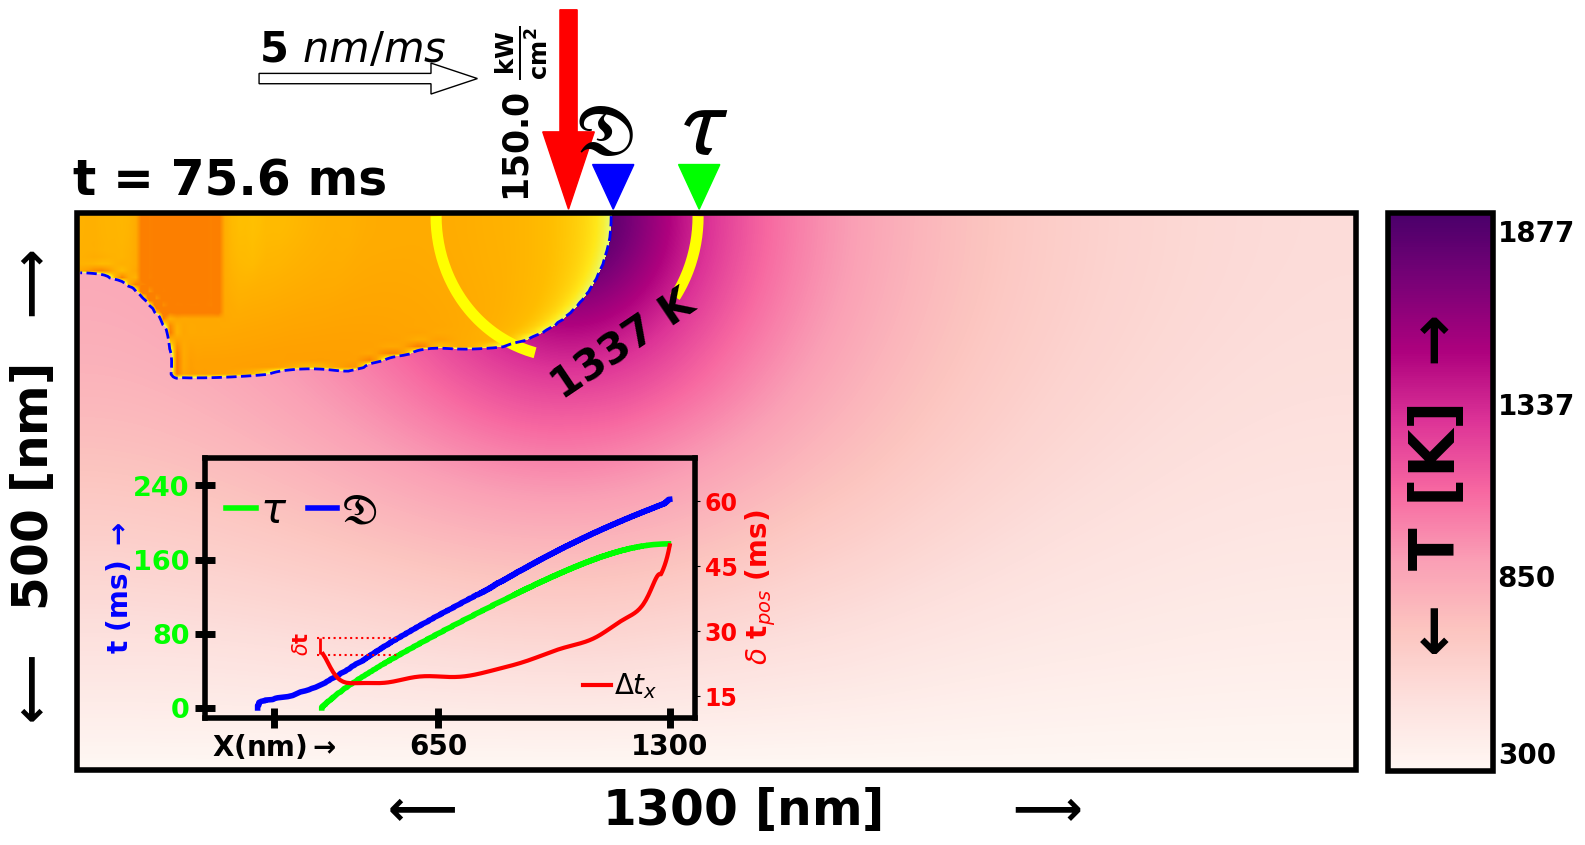

In [14]:
t_step = 100
if t_step>=end_step:
    t_step=end_step-1
    
scan_speed = '5' # nano meter per micro sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
max_temp_dt = max_temp_index[2]+mid_dt 

laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)
####################################################

x = np.arange(time_steps-1)


fig, ax1 = plt.subplots(1, 1, figsize=[14, 10], frameon=True)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp[:,:,t_step], cmap='RdPu', interpolation='bilinear')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


############### Arrow #########################
if max_temp_pos[1]<370:
    
    # ax1.text(max_temp_pos[1]-10,-20, "LASER", rotation=90, color='k', fontsize=25, weight='bold')
    ax1.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='k', fontsize=25, weight='bold')
    ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
    
    if t_step <100:
        ax1.arrow(max_temp_pos[1]+18, -40, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax1.text(max_temp_pos[1]+18, -45, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=35, weight='bold')
    else:
        ax1.arrow(max_temp_pos[1]-90, -40, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
        ax1.text(max_temp_pos[1]-90, -45, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
else:
    ax1.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax1.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
    ax1.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='none', fontsize=25, weight='bold')
    ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)

    ax1.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')



ax1.set_ylim(162, -2)
ax1.set_xlim(-2,380)
# ##############################################

################## Meltpool and Isotherm ################
cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
meltpool_1 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.85, vmax=1.0, interpolation='bilinear')

# if t_step <450:
#     ax1.arrow(leading_temperature[t_step], -10, 0, 8,  width = 5, head_width=5, color='darkcyan', length_includes_head=True, clip_on=False)
# else:
#     ax1.arrow(leading_temperature[t_step]-2, -10, 0, 8,  width = 5, head_width=5, color='darkcyan', length_includes_head=True, clip_on=False)

# ax1.arrow(leading_temperature[t_step]+0.5, -10, 0, 8,  width = 5, head_width=5, color='lime', length_includes_head=True, clip_on=False)
# ax1.text(leading_temperature[t_step]+3, -3, s=r'$\tau$', fontsize=25, weight = 'bold')
ax1.arrow(leading_temperature[t_step]+1, -15, 0, 13,  width = 10, head_width=12, head_length=13, color='lime', length_includes_head=True, clip_on=False)
ax1.text(leading_temperature[t_step]-5, -18, s=r'$\mathfrak{\tau}$', fontsize=70, weight = 'bold')

if t_step<T_slope0_dt: # 292
    # ax1.arrow(leading_LIQ[t_step]+1, 9, 0, -9,  width = 5, head_width=5,  color='b', length_includes_head=True, clip_on=False)
    ax1.arrow(leading_LIQ[t_step]+1, -15, 0, 13,  width = 10, head_width=12,  head_length=13,  color='b', length_includes_head=True, clip_on=False)
else:
    # ax1.arrow(leading_LIQ[t_step], 9, 0, -9,  width = 5, head_width=5,  color='b', length_includes_head=True, clip_on=False)
    ax1.arrow(leading_LIQ[t_step], -15, 0, 13,  width = 10, head_width=12,  head_length=13,  color='b', length_includes_head=True, clip_on=False)

# ax1.text(leading_LIQ[t_step]+3, 11, s=r'$\mathfrak{D}$', fontsize=25, weight = 'bold')
ax1.text(leading_LIQ[t_step]-10, -18, s=r'$\mathfrak{D}$', fontsize=50, weight = 'bold')






################# Contour ##################
# ##############################################
contour_levels = [1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='yellow', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=30, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

contour_level_LIQ = [0.85]
contour_LIQ = plt.contour(Au_LIQ[:, :, t_step], levels=contour_level_LIQ, colors='b',linestyles='--', linewidths=2,)



ax1.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', fontsize = 35, weight ='bold', labelpad=10)
ax1.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.03, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 35, weight = 'bold',
             color='k', ha='center', va='center')


############## Color Bar ###########
ax2 = fig.add_axes([0.99, 0.207, 0.075, 0.558])
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=20,direction='in', length=0) 
cbar.set_ticks([300+50, 850, 1337, max_temp-50],labels=['300', '850', '1337',  f'{max_temp}'], weight='bold') 
# cbar.set_label('$_{\longleftarrow}$   T $[K]$   $_{\longrightarrow}$',  labelpad=-95, fontsize=30, rotation=90, weight='bold')
cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='k',  labelpad=-120, fontsize=45, rotation=90, weight='bold')

#################################


##############################################
##############################################


ax3 = fig.add_axes([0.55, 0.26, 0.35, 0.26])  # [left, bottom, width, height]
if t_step >= 100:  # Change position of ax2 at t = 10
    ax3.set_position([0.145, 0.26, 0.35, 0.26])

ax3.set_facecolor((0, 0, 0, 0))

if t_step>=T_end_dt:
    ax3.plot(leading_temperature[1:T_end_dt], time_lead_lag[1:T_end_dt], marker='o', c='lime',markersize=1, linewidth=4, label =r'$\tau$')
    # ax3.plot(leading_temperature[1:], time_lead_lag[1:], marker='o', c='lime',markersize=1, linewidth=4, label =r'$\tau$')
else:
    # ax3.plot(leading_temperature[1:t_step], time_lead_lag[1:t_step], marker='o', c='lime',markersize=1, linewidth=4, label =r'$\tau$')
    ax3.plot(leading_temperature[1:T_end_dt], time_lead_lag[1:T_end_dt], marker='o', c='lime',markersize=1, linewidth=4, label =r'$\tau$')
    
# ax3.plot(leading_LIQ[1:t_step], time_lead_lag[1:t_step], marker='.', c='blue',markersize=1,linewidth=4, label =r'$\mathfrak{D}$')
ax3.plot(leading_LIQ[1:], time_lead_lag[1:], marker='.', c='blue',markersize=1,linewidth=4, label =r'$\mathfrak{D}$')

################### dt and attow ######################
if t_step>=common_position:
    ax3.hlines(y=phase_fit_real_time(leading_LIQ[t_step]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linestyle=':', color='red')
    if t_step>=T_slope0_dt:
        ax3.hlines(y=temp_fit_real_time(leading_LIQ[T_slope0_dt]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linestyle=':', color='red')
        ax3.vlines(x=leading_LIQ[t_step]-62,  ymin=temp_fit_real_time(leading_LIQ[T_slope0_dt])+1, ymax=phase_fit_real_time(leading_LIQ[t_step]), linestyle='-', color='red', linewidth=2)
        ax3.text(x=leading_LIQ[t_step]-85, y= np.mean([phase_fit_real_time(leading_LIQ[t_step]), temp_fit_real_time(leading_LIQ[T_slope0_dt])])-5, s=r"$\delta$t", color='red', fontsize=15, rotation=90, weight='bold')
    else:
        ax3.hlines(y=temp_fit_real_time(leading_LIQ[t_step]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linestyle=':', color='red')
        ax3.vlines(x=leading_LIQ[t_step]-62,  ymin=temp_fit_real_time(leading_LIQ[t_step])+1, ymax=phase_fit_real_time(leading_LIQ[t_step]), linestyle='-', color='red', linewidth=2)
        ax3.text(x=leading_LIQ[t_step]-85, y=np.mean([phase_fit_real_time(leading_LIQ[t_step]), temp_fit_real_time(leading_LIQ[t_step])])-5, s=r"$\delta$t", color='red', fontsize=15, rotation=90, weight='bold')

ax3.set_ylabel(r"t (ms) $\mathbf{\rightarrow}$",  weight = 'bold', size=20, color='blue',labelpad=-1 )
# # ax3.set_xlabel(r"X (nm)", weight='bold', size=25, color='white', labelpad=1, ha='center')
ax3.set_xticks([55, 185.5, 370], labels=[ r'X(nm)$\mathbf{\rightarrow}$', f'{185.5*(1300/371):.0f}', f'1300'], size=20, color='black', weight='bold',)
# # ax3.set_xticks([93, 185, 350], labels=[ f'{93*(1300/371):.0f}', f'{185*(1300/371):.0f}', f'1300'], size=20, color='white', weight='bold',)
ax3.xaxis.set_tick_params(direction='in', length=0) 
ax3.yaxis.set_tick_params(labelcolor='lime', labelsize=19.5)
for label in ax3.get_yticklabels(): label.set_fontweight('bold')

ax3.yaxis.set_major_locator(plt.MaxNLocator(4))
ax3.set_ylim([-10,270])
ax3.set_xlim([0,390])
legend_1 = ax3.legend(loc=(0.01,0.65), ncol=2, columnspacing=0.5, prop={'weight':'bold', 'size':'30',}, handletextpad=0.1, handlelength=0.7,   frameon=False).get_frame().set_facecolor('none')


ax4 = ax3.twinx()
if t_step>common_position:
    # ax4.plot(leading_LIQ[common_position:t_step],lag_time[common_position:t_step], linestyle='-',  c='red', linewidth=3, label =r'$\Delta t_{x}$') # positional_timelag
    ax4.plot(leading_LIQ[common_position:],lag_time[common_position:], linestyle='-',  c='red', linewidth=3, label =r'$\Delta t_{x}$') # positional_timelag

legend_2 = ax4.legend(loc=(0.75, 0.02),  prop={'weight':'bold', 'size':'20',}, handletextpad=0.1, handlelength=1.0,   frameon=False).get_frame().set_facecolor('none')

ax4.set_ylabel("$\delta$ t$_{pos}$ (ms)",  weight = 'bold', size=20, color='red')
ax4.yaxis.set_tick_params(labelcolor='red', labelsize=17)  
ax4.yaxis.set_major_locator(plt.MaxNLocator(4))
for label in ax4.get_yticklabels(): label.set_fontweight('bold')

ax4.set_ylim([10,70])
ax4.set_xlim([0,390])


ax3.tick_params(axis='y', direction='inout', which='both', color='k', length=15, width=5)
ax3.tick_params(axis='x', direction='inout', which='both', color='k', length=15, width=5)

ax1.spines[:].set_linewidth(0)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
ax3.spines[:].set_linewidth(4)
ax3.spines[:].set_color('k')
ax1.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))



plt.tight_layout()

# plt.savefig('figures/m2/diffusion_lag_lead_M2.png', bbox_inches='tight',  dpi=800)
plt.show()

## Lead Lag Animation

In [ ]:
def update_plot(t_steps, scan_speed, irradiance):
    t_step = t_steps+1

    max_temp = round(temp[:,:,t_step].max())
    max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)
    
    mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
    max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
    max_temp_dt = max_temp_index[2]+mid_dt 
    
    laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

    x = np.arange(time_steps-1)

    # ###### Comment if only save animation | Uncomment if want to save individual frame image also
    fig, ax1 = plt.subplots(1, 1, figsize=[14, 10], frameon=True)
    ax1.set_facecolor((0, 0, 0, 0))
    ax1.clear()

    hmap1 = ax1.imshow(temp[:,:,t_step], cmap='RdPu', interpolation='bilinear')
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    ############### Arrow #########################
    if max_temp_pos[1]<370:
        
        # ax1.text(max_temp_pos[1]-10,-20, "LASER", rotation=90, color='k', fontsize=25, weight='bold')
        ax1.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='k', fontsize=25, weight='bold')
        ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='red', length_includes_head=True, clip_on=False)
        
        if t_step <100:
            ax1.arrow(max_temp_pos[1]+18, -40, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax1.text(max_temp_pos[1]+18, -45, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
            ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=35, weight='bold')
        else:
            ax1.arrow(max_temp_pos[1]-90, -40, 50, 0,  width = 3, color='k', fill=False, clip_on=False)
            ax1.text(max_temp_pos[1]-90, -45, s=f'{scan_speed} $nm/ms$', fontsize=30, weight = 'bold')
            ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
    else:
        ax1.text(370-70, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax1.text(370-65, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=30, weight='bold')
        ax1.text(max_temp_pos[1]-22,-10, irradiance, rotation=90, color='none', fontsize=25, weight='bold')
        ax1.arrow(max_temp_pos[1], -60, 0, 58,  width = 5, color='none', length_includes_head=True, clip_on=False)
    
        ax1.arrow(350, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
        ax1.set_title(f't = {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=35, weight='bold')
    
    ax1.set_ylim(162, -2)
    ax1.set_xlim(-2,380)

    ################## Meltpool and Isotherm ################
    cmap = plt.get_cmap('Wistia')
    cmap.set_under('white', alpha=0) 
    meltpool_1 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.85, vmax=1.0, interpolation='bilinear')

    ################# Contour ##################
    ############################################
    contour_levels = [1337]
    contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='yellow', linewidths=8,)
    clabels = plt.clabel(contour, inline=True, fontsize=30, colors='k', fmt='%1.0f K')
    for label in clabels: label.set_fontweight('bold')
    
    contour_level_LIQ = [0.85]
    contour_LIQ = plt.contour(Au_LIQ[:, :, t_step], levels=contour_level_LIQ, colors='b', linestyles='--', linewidths=2,)


    ax1.arrow(leading_temperature[t_step]+1, -15, 0, 13,  width = 10, head_width=12, head_length=13, color='lime', length_includes_head=True, clip_on=False)
    ax1.text(leading_temperature[t_step]-5, -18, s=r'$\mathfrak{\tau}$', fontsize=70, weight = 'bold')
    
    if t_step<T_slope0_dt: # 292
        ax1.arrow(leading_LIQ[t_step], 13, 0, -13,  width = 10, head_width=12,  head_length=13,  color='b', length_includes_head=True, clip_on=False)
    else:
        ax1.arrow(leading_LIQ[t_step], 13, 0, -13,  width = 10, head_width=12,  head_length=13,  color='b', length_includes_head=True, clip_on=False)
    
    ax1.text(leading_LIQ[t_step]-23, 15, s=r'$\mathfrak{D}$', fontsize=50, weight = 'bold')
    
    ax1.set_xlabel('$\mathbf{\longleftarrow}$        1300 $\mathbf{[nm]}$       $\mathbf{\longrightarrow}$', fontsize = 35, weight ='bold', labelpad=10)
    ax1.annotate('$\mathbf{\longleftarrow}$  500 $\mathbf{[nm]}$  $\mathbf{\longrightarrow}$', xy=(0.5, 0.5), xytext=(-0.03, 0.5), rotation=90,
                 xycoords='axes fraction', textcoords='axes fraction', fontsize = 35, weight = 'bold',
                 color='k', ha='center', va='center')

    ############## Color Bar ###########
    ax2 = fig.add_axes([0.99, 0.207, 0.075, 0.558])
    ax2.clear()
    ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    cbar.ax.tick_params(labelsize=20,direction='in', length=0) 
    cbar.set_ticks([300+50, 850, 1337, max_temp-50],labels=['300', '850', '1337',  f'{max_temp}'], weight='bold') 
    cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='k',  labelpad=-120, fontsize=45, rotation=90, weight='bold')

    #################################
    if t_step <110:
        ax3 = fig.add_axes([0.55, 0.26, 0.35, 0.26]) # [left, bottom, width, height]
    else:
        ax3 = fig.add_axes([0.145, 0.26, 0.35, 0.26])  # [left, bottom, width, height]
    ax3.set_facecolor((0, 0, 0, 0))

    ax3.clear()

    if t_step>=T_end_dt:
        ax3.plot(leading_temperature[1:T_end_dt], time_lead_lag[1:T_end_dt], marker='o', c='lime',markersize=1, linewidth=4, label =r'$\tau$')
    else:
        ax3.plot(leading_temperature[1:t_step], time_lead_lag[1:t_step], marker='o', c='lime',markersize=1, linewidth=4, label =r'$\tau$')
        
    ax3.plot(leading_LIQ[1:t_step], time_lead_lag[1:t_step], marker='.', c='blue',markersize=1,linewidth=4, label =r'$\mathfrak{D}$')

    if t_step>=common_position:
        ax3.hlines(y=phase_fit_real_time(leading_LIQ[t_step]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linestyle=':', color='red')
        if t_step>=T_slope0_dt:
            ax3.hlines(y=temp_fit_real_time(leading_LIQ[T_slope0_dt]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linestyle=':', color='red')
            ax3.vlines(x=leading_LIQ[t_step]-62,  ymin=temp_fit_real_time(leading_LIQ[T_slope0_dt])+1, ymax=phase_fit_real_time(leading_LIQ[t_step]), linestyle='-', color='red', linewidth=2)
            ax3.text(x=leading_LIQ[t_step]-85, y= np.mean([phase_fit_real_time(leading_LIQ[t_step]), temp_fit_real_time(leading_LIQ[T_slope0_dt])])-5, s=r"$\delta$t", color='red', fontsize=15, rotation=90, weight='bold')
        else:
            ax3.hlines(y=temp_fit_real_time(leading_LIQ[t_step]), xmax=leading_LIQ[t_step], xmin=leading_LIQ[t_step]-65, linestyle=':', color='red')
            ax3.vlines(x=leading_LIQ[t_step]-62,  ymin=temp_fit_real_time(leading_LIQ[t_step])+1, ymax=phase_fit_real_time(leading_LIQ[t_step]), linestyle='-', color='red', linewidth=2)
            ax3.text(x=leading_LIQ[t_step]-85, y=np.mean([phase_fit_real_time(leading_LIQ[t_step]), temp_fit_real_time(leading_LIQ[t_step])])-5, s=r"$\delta$t", color='red', fontsize=15, rotation=90, weight='bold')

    ax3.set_ylabel(r"t [ms] $\mathbf{\rightarrow}$",  weight = 'bold', size=20, color='blue',labelpad=-1 )
    ax3.set_xticks([55, 185.5, 370], labels=[ r'X[nm]$\mathbf{\rightarrow}$', f'{185.5*(1300/371):.0f}', f'1300'], size=20, color='black', weight='bold',)
    ax3.xaxis.set_tick_params(direction='in', length=0) 
    ax3.yaxis.set_tick_params(labelcolor='lime', labelsize=19.5)
    for label in ax3.get_yticklabels(): label.set_fontweight('bold')
    
    ax3.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax3.set_ylim([-10,270])
    ax3.set_xlim([0,390])
    legend_1 = ax3.legend(loc=(0.01,0.65), ncol=2, columnspacing=0.5, prop={'weight':'bold', 'size':'30',}, handletextpad=0.1, handlelength=0.7,   frameon=False).get_frame().set_facecolor('none')

    ax4 = ax3.twinx()
    if t_step>common_position:
        ax4.plot(leading_LIQ[common_position:t_step],lag_time[common_position:t_step], linestyle='-',  c='red', linewidth=3, label =r'$\Delta t_{x}$') # positional_timelag
        legend_2 = ax4.legend(loc=(0.75,0.02),  prop={'weight':'bold', 'size':'20',}, handletextpad=0.1, handlelength=1.0,   frameon=False).get_frame().set_facecolor('none')
    
    ax4.set_ylabel("$\delta$ t$_{pos}$ [ms]",  weight = 'bold', size=20, color='red')
    ax4.yaxis.set_tick_params(labelcolor='red', labelsize=17)  
    ax4.yaxis.set_major_locator(plt.MaxNLocator(4))
    for label in ax4.get_yticklabels(): label.set_fontweight('bold')
    
    ax4.set_ylim([10,70])
    ax4.set_xlim([0,390])

    ax3.tick_params(axis='y', direction='inout', which='both', color='k', length=15, width=5)
    ax3.tick_params(axis='x', direction='inout', which='both', color='k', length=15, width=5)
          
    ax1.spines[:].set_linewidth(0)
    ax1.spines[:].set_color('k')
    ax2.spines[:].set_linewidth(4)
    ax3.spines[:].set_linewidth(4)
    ax3.spines[:].set_color('k')
    ax1.add_patch(patches.Rectangle((-1, -1), 372, 162, linewidth=4, edgecolor='k', facecolor='none'))
    
    plt.tight_layout()


# t_steps = model.dimensions['time_step'].size-1 # 50
t_steps = 801 # end for lead lag
scan_speed = '5'
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"


############ To save the image as well #############
for time_step in range(500, 800, 1):
    # for time_step in range(t_steps):
    update_plot(time_step, scan_speed, irradiance)
    plt.savefig(f'animation/m1/temporary_figures/isotherm/f_{time_step}.png', bbox_inches='tight', dpi=100)
    plt.close() 


## Video Animation All

In [26]:
## Video Animation from Pictures
import subprocess
subprocess.call(['ffmpeg', '-y', '-framerate', '66.823', '-i', 'animation/m1/temporary_figures/area/f_%d.png',        '-c:v', 'libx264', '-r', '66.823', '-s', '1920x1080', '-pix_fmt', 'yuv420p', 'animation/m1/AREA.mp4'])
subprocess.call(['ffmpeg', '-y', '-framerate', '66.823', '-i', 'animation/m1/temporary_figures/phases/f_%d.png',      '-c:v', 'libx264', '-r', '66.823', '-s', '1920x1080', '-pix_fmt', 'yuv420p', 'animation/m1/PHASE.mp4'])
subprocess.call(['ffmpeg', '-y', '-framerate', '71.212', '-i', 'animation/m1/temporary_figures/isotherm/f_%d.png',    '-c:v', 'libx264', '-r', '71.212', '-s', '1920x1080', '-pix_fmt', 'yuv420p', 'animation/m1/ISOTHERM.mp4'])
subprocess.call(['ffmpeg', '-y', '-framerate', '73.857', '-i', 'animation/m1/temporary_figures/temperature/f_%d.png', '-c:v', 'libx264', '-r', '73.857', '-s', '1920x1080', '-pix_fmt', 'yuv420p', 'animation/m1/TEMPERATURE.mp4'])


ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-5)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libo

0

# For Paper

## Temperature Distribution

In [5]:
path1 = os.path.abspath('../numpy_files/m1/')
time_ms = np.load(path1+'/time_ms.npy')
temp = np.load(path1+'/temp.npy')
time_steps =  time_ms.shape[0]

/tmp/ipykernel_117499/3851838593.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


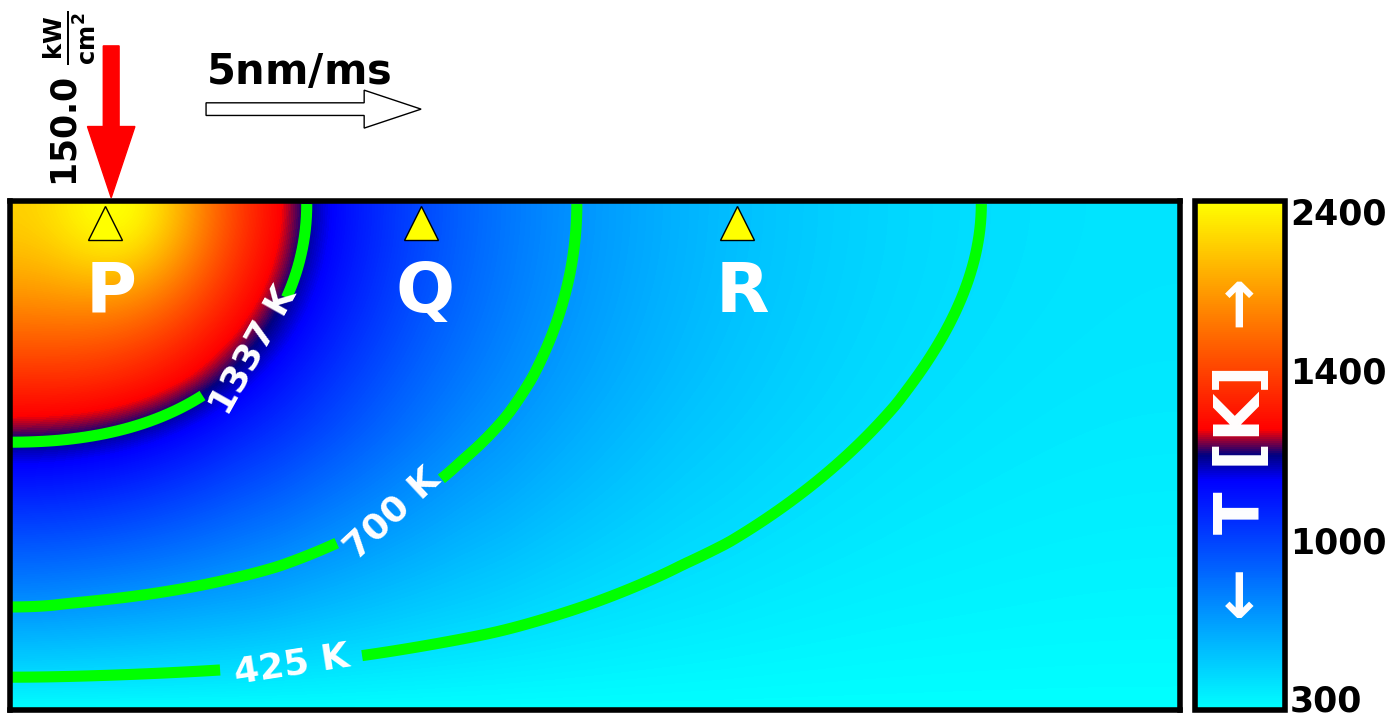

In [6]:
t_step = 4

scan_speed = '5' # nano meter per micro sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

fig, ax1 = plt.subplots(1, 1, figsize=[12, 8], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp[:,:,t_step], cmap=cold2hot, interpolation='bilinear')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

############### Arrow #########################
ax1.text(max_temp_pos[1]-22,-12, irradiance, rotation=90, color='k', fontsize=25, weight='bold')
ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 5, color='red', length_includes_head=True, clip_on=False)
ax1.arrow(max_temp_pos[1]+30, -30, 50, 0,  width = 4, color='k', fill=False, clip_on=False)
ax1.text(max_temp_pos[1]+30, -38, s=f'{scan_speed}'+r'$\mathbf{nm/ms}$', fontsize=30, weight = 'bold')
# ax1.set_title(f't = {real_time[t_step]:.0f} ms', pad=10, loc='left', fontsize=30, weight='bold')
ax1.set_ylim(160, -1)
ax1.set_xlim(0,370)

contour_levels = [425, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='lime', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=26, colors='white', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

############## Color Bar ###########
ax2 = fig.add_axes([1.0, 0.133, 0.075, 0.636]) # [left, bottom, width, height]
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='white',  labelpad=-125, fontsize=45, rotation=90, weight='bold')
cbar.set_ticks([350, 1000, 1700, 2350], labels=['300', '1000', '1400',  '2400'], weight='bold') 

ax1.plot(30,  6.0, marker='^', color='yellow', mec='k', markersize=25) ## Point P is selected to be the point where laser hits the material
ax1.text(24,  34, "P", rotation=0, color='white', fontsize=50, weight='bold')
ax1.plot(130, 6.0, marker='^', color='yellow',mec='k', markersize=25)  # random point Q which is 100 distance far away from point P 
ax1.text(122, 34, "Q", rotation=0, color='white', fontsize=50, weight='bold')
ax1.plot(230, 6.0, marker='^', color='yellow',mec='k', markersize=25)  # random point R which is 100 distance far away from point Q
ax1.text(223, 34, "R", rotation=0, color='white', fontsize=50, weight='bold')

ax1.spines[:].set_linewidth(4)
ax2.spines[:].set_linewidth(4)


plt.tight_layout()

# plt.savefig('for_manuscript/T_u/F1/jpg/I150_s5_t2ms.jpg', bbox_inches='tight',pad_inches=0, )
# plt.savefig('for_manuscript/T_u/F1/I150_s5_t2ms.png', bbox_inches='tight',pad_inches=0, dpi=800)
plt.show()

/tmp/ipykernel_88532/2330040352.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


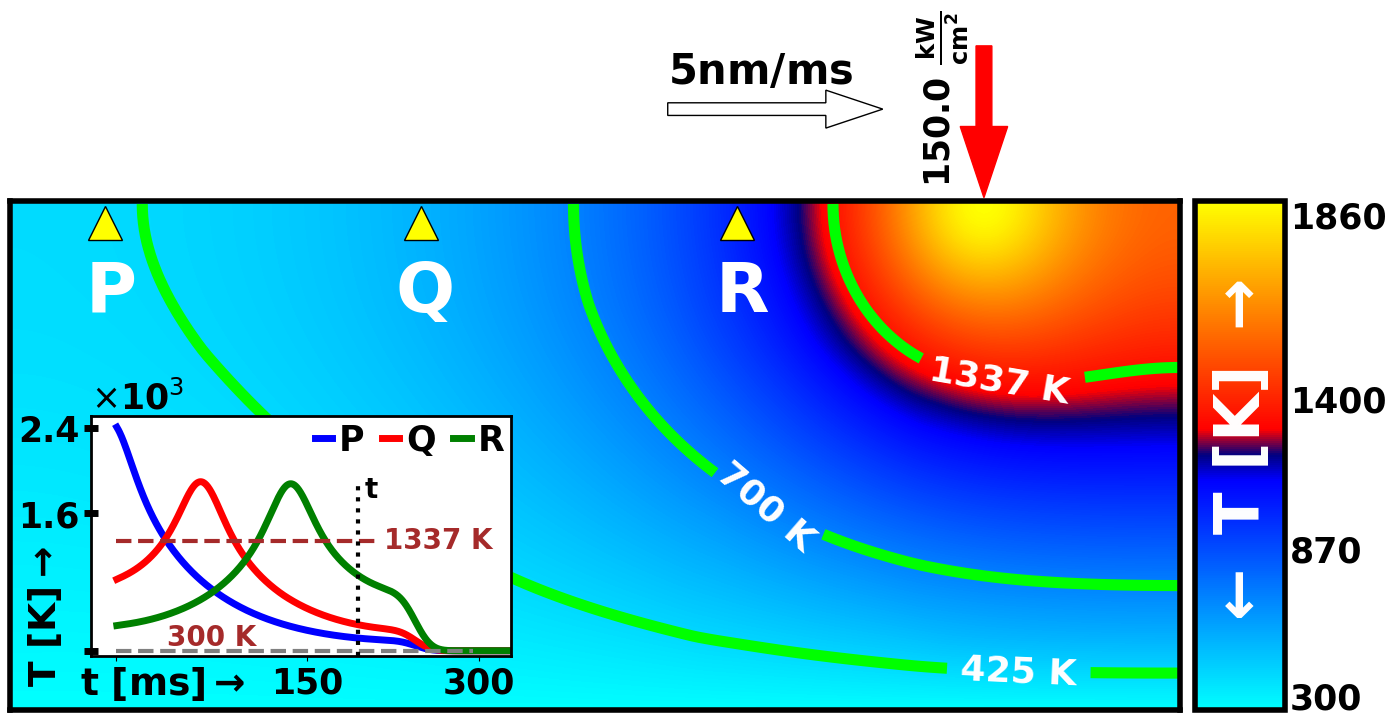

In [10]:
t_step = 576

if t_step>975:
    t_step=975
scan_speed = '5' # nano meter per micro sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

# mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
# max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
# max_temp_dt = max_temp_index[2]+mid_dt 

# laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)
####################################################

# x = np.arange(time_steps-1)
x = time_ms[1:time_steps] 
point_1 = temp[0,30,1:time_steps]
point_2 = temp[0,130,1:time_steps]
point_3 = temp[0,230,1:time_steps]

fig, ax1 = plt.subplots(1, 1, figsize=[12, 8], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp[:,:,t_step], cmap=cold2hot, interpolation='bilinear')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

############### Arrow #########################
ax1.text(max_temp_pos[1]-22,-12, irradiance, rotation=90, color='k', fontsize=25, weight='bold')
ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 5, color='red', length_includes_head=True, clip_on=False)
ax1.arrow(max_temp_pos[1]-100, -30, 50, 0,  width = 4, color='k', fill=False, clip_on=False)
ax1.text(max_temp_pos[1]-100, -38, s=f'{scan_speed}'+r'$\mathbf{nm/ms}$', fontsize=30, weight = 'bold')
# ax1.set_title(f't = {real_time[t_step]:.0f} ms', pad=10, loc='left', fontsize=30, weight='bold')
ax1.set_ylim(160, -1)
ax1.set_xlim(0,370)

contour_levels = [425, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='lime', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=26, colors='white', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

############## Color Bar ###########
ax2 = fig.add_axes([1.0, 0.133, 0.075, 0.636]) # [left, bottom, width, height]
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='white',  labelpad=-125, fontsize=45, rotation=90, weight='bold')
cbar.set_ticks([300+50, 870, 1400, 2050], labels=['300', '870', '1400',  '1860'], weight='bold') 

ax1.plot(30,  6.0, marker='^', color='yellow', mec='k', markersize=25) ## Point P is selected to be the point where laser hits the material
ax1.text(24,  34, "P", rotation=0, color='white', fontsize=50, weight='bold')
ax1.plot(130, 6.0, marker='^', color='yellow',mec='k', markersize=25)  # random point Q which is 100 distance far away from point P 
ax1.text(122, 34, "Q", rotation=0, color='white', fontsize=50, weight='bold')
ax1.plot(230, 6.0, marker='^', color='yellow',mec='k', markersize=25)  # random point R which is 100 distance far away from point Q
ax1.text(223, 34, "R", rotation=0, color='white', fontsize=50, weight='bold')



ax3 = fig.add_axes([0.08, 0.2, 0.35, 0.30])

ax3.plot(x, point_1, linewidth=5, linestyle='-', color = 'blue', label ='P')
ax3.plot(x, point_2, linewidth=5, linestyle='-', color='red', label='Q')
ax3.plot(x, point_3, linewidth=5, linestyle='-', color='green', label='R')
# ax3.set_ylabel(r"T [K]$ \rightarrow$", loc='bottom',  weight = 'bold', labelpad=-30, size=20, color='k')

ax3.set_yticks([300, 1600, 2400], labels=[' ', '1.6', '2.4',], size=25, color='k', weight='bold')
ax3.set_xticks([0, 150, 285], labels=[r" ", '150', '300'], size=25, color='k', weight='bold')
ax3.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=25, weight='bold')
ax3.set_ylim(bottom=250)
ax3.set_xlim(-20, 310)

ax3.tick_params(axis='y', direction='inout', which='both', length=10, width=5, color='k')


legend = ax3.legend(loc=(0.50, 0.77), ncol=3,  columnspacing=0.5, prop={'weight':'bold', 'size':'25',}, handletextpad=0.2, handlelength=0.5,   frameon=False).get_frame().set_facecolor('none')

ax3.hlines(y=1337, xmin=0, xmax=240, color='brown', linewidth=3, linestyle='--',)
ax3.text(210, 1337-70, f"{1337} K", rotation=0, color='brown', fontsize=20, weight='bold', backgroundcolor='white',)

ax3.hlines(y=300, xmin=0, xmax=280, color='gray', linewidth=3, linestyle='--',)
ax3.text(40, 350, f"{300} K", rotation=0, color='brown', fontsize=20, weight='bold',)# backgroundcolor='white',)

x = time_ms[1:t_step+1]
ax3.vlines(x=x[-1], ymin=250, ymax=1900, linestyle='dotted', linewidth=3, color='k')
ax3.text(x[-1]+5, 1750, f't', rotation=0, color='k', fontsize=20, weight='bold',)

ax1.text(5, 150, r"T [K]$\mathbf{\rightarrow}$", rotation=90, color='k', fontsize=27, weight='bold',)
ax1.text(22, 155, r"t [ms]$\mathbf{\rightarrow}$", rotation=0, color='k', fontsize=27, weight='bold',)




ax1.spines[:].set_linewidth(4)
ax2.spines[:].set_linewidth(4)
ax3.spines[:].set_linewidth(2)


plt.tight_layout()

# plt.savefig('for_manuscript/T_u/F1/jpg/I150_s5_t190ms.jpg', bbox_inches='tight',pad_inches=0, )
# plt.savefig('for_manuscript/T_u/F1/I150_s5_t190ms.png', bbox_inches='tight',pad_inches=0, dpi=800)
plt.show()

/tmp/ipykernel_88532/2145528634.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


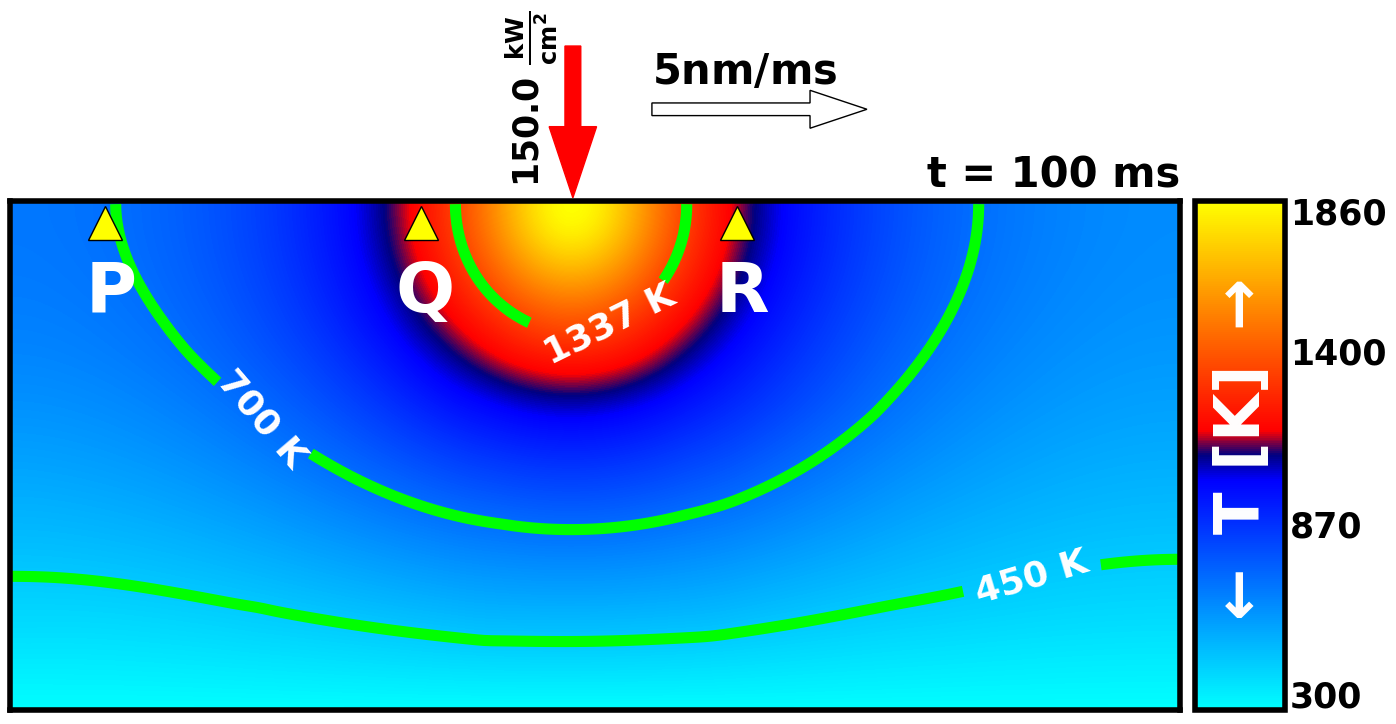

In [13]:
t_step = 139

scan_speed = '5' # nano meter per micro sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

# mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
# max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
# max_temp_dt = max_temp_index[2]+mid_dt 

# laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)
####################################################

# # x = np.arange(time_steps-1)
# x = time_ms[1:time_steps] 
# point_1 = temp[0,30,1:time_steps]
# point_2 = temp[0,130,1:time_steps]
# point_3 = temp[0,230,1:time_steps]

fig, ax1 = plt.subplots(1, 1, figsize=[12, 8], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp[:,:,t_step], cmap=cold2hot, interpolation='bilinear')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

############### Arrow #########################
ax1.text(max_temp_pos[1]-22,-12, irradiance, rotation=90, color='k', fontsize=25, weight='bold')
ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 5, color='red', length_includes_head=True, clip_on=False)
ax1.arrow(max_temp_pos[1]+25, -30, 50, 0,  width = 4, color='k', fill=False, clip_on=False)
ax1.text(max_temp_pos[1]+25, -38, s=f'{scan_speed}'+r'$\mathbf{nm/ms}$', fontsize=30, weight = 'bold')
ax1.set_title(f't = {real_time[t_step]:.0f} ms', pad=10, loc='right', fontsize=30, weight='bold')
ax1.set_ylim(160, -1)
ax1.set_xlim(0,370)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='lime', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=26, colors='white', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

############## Color Bar ###########
ax2 = fig.add_axes([1.0, 0.133, 0.075, 0.636]) # [left, bottom, width, height]
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='white',  labelpad=-125, fontsize=45, rotation=90, weight='bold')
cbar.set_ticks([300+50, 870, 1400, 1830], labels=['300', '870', '1400',  '1860'], weight='bold') 

ax1.plot(30,  6.0, marker='^', color='yellow', mec='k', markersize=25) ## Point P is selected to be the point where laser hits the material
ax1.text(24,  34, "P", rotation=0, color='white', fontsize=50, weight='bold')
ax1.plot(130, 6.0, marker='^', color='yellow',mec='k', markersize=25)  # random point Q which is 100 distance far away from point P 
ax1.text(122, 34, "Q", rotation=0, color='white', fontsize=50, weight='bold')
ax1.plot(230, 6.0, marker='^', color='yellow',mec='k', markersize=25)  # random point R which is 100 distance far away from point Q
ax1.text(223, 34, "R", rotation=0, color='white', fontsize=50, weight='bold')

ax1.spines[:].set_linewidth(4)
ax2.spines[:].set_linewidth(4)
b

plt.tight_layout()

# plt.savefig('for_manuscript/T_u/F2/jpg/I150_s5_t100ms.jpg', bbox_inches='tight', pad_inches=0,) 
# plt.savefig('for_manuscript/T_u/F2/I150_s5_t100ms.png', bbox_inches='tight', pad_inches=0, dpi=800)

plt.show()

### Graphical Abstract

/tmp/ipykernel_117499/3761886867.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


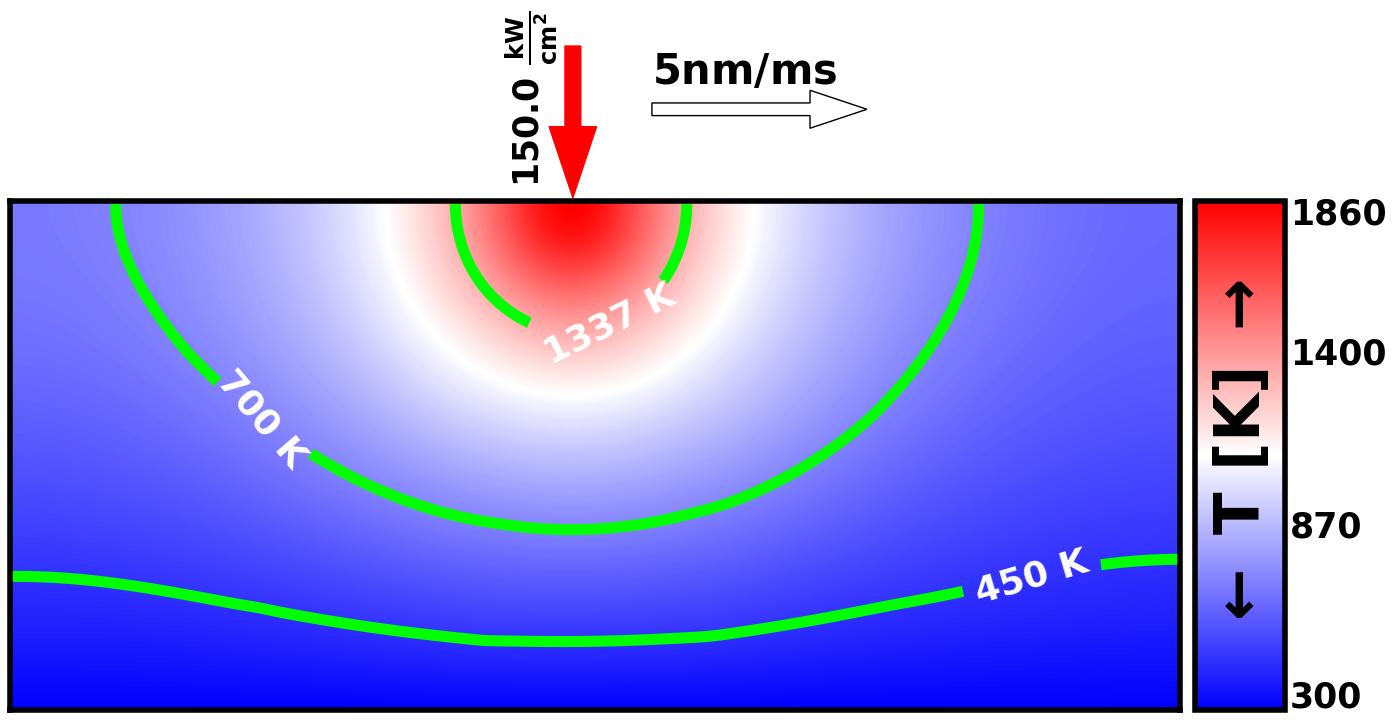

In [20]:
t_step = 139

scan_speed = '5' # nano meter per micro sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150.0 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

fig, ax1 = plt.subplots(1, 1, figsize=[12, 8], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp[:,:,t_step], cmap='bwr', interpolation='bilinear')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

############### Arrow #########################
ax1.text(max_temp_pos[1]-22,-12, irradiance, rotation=90, color='k', fontsize=25, weight='bold')
ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 5, color='red', length_includes_head=True, clip_on=False)
ax1.arrow(max_temp_pos[1]+25, -30, 50, 0,  width = 4, color='k', fill=False, clip_on=False)
ax1.text(max_temp_pos[1]+25, -38, s=f'{scan_speed}'+r'$\mathbf{nm/ms}$', fontsize=30, weight = 'bold')
ax1.set_ylim(160, -1)
ax1.set_xlim(0,370)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp[:, :, t_step], levels=contour_levels, colors='lime', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=26, colors='white', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

############## Color Bar ###########
ax2 = fig.add_axes([1.0, 0.133, 0.075, 0.636]) # [left, bottom, width, height]
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{{\leftarrow}}$ T $\mathbf{[K]}$ ${\mathbf{\rightarrow}}$', color='k',  labelpad=-125, fontsize=45, rotation=90, weight='bold')
cbar.set_ticks([300+50, 870, 1400, 1830], labels=['300', '870', '1400',  '1860'], weight='bold') 

ax1.spines[:].set_linewidth(4)
ax2.spines[:].set_linewidth(4)


plt.tight_layout()

plt.savefig('for_manuscript/temperature_graphical.png', bbox_inches='tight', dpi=800)

plt.show()

## Phase with text

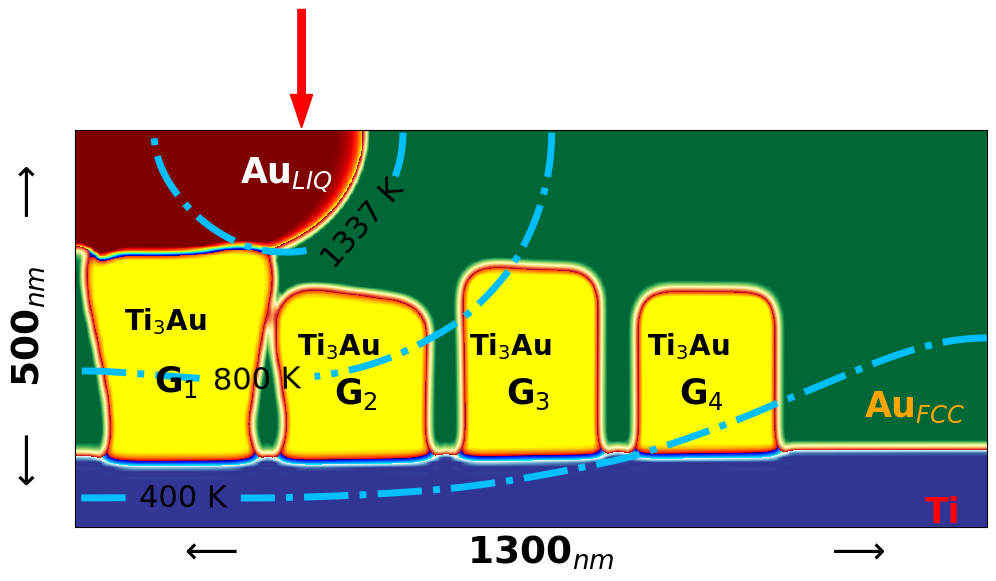

In [31]:
t_step = 49
scan_speed = '5'  # micro meter per sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150 $\mathbf{\frac{kW}{cm^2}}$"

end_step = len(time_ms)
meltpool_front = leading_front(array=Au_LIQ, condition=0.85, end_time_step= end_step) 

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
max_temp_dt = max_temp_index[2]+mid_dt 

laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

## Finding the time step at which the specimen cools below melting temperature near the end of simulation  
total_time_steps = temp.shape[2]-1
dt_ = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 1337)

####################################################



fig, ax1 = plt.subplots(1,1, figsize=(10,6), frameon=True)

cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
Ti_txt = ax1.text(345, 158,'Ti', fontsize = 25, weight='bold', color='red')

cmap=cold2hot
cmap.set_under('white', alpha=0) 
hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
imc1txt3 = ax1.text(20, 80,'Ti$_3$Au', fontsize = 20, weight='bold')
imc1txt3 = ax1.text(32, 105,'G$_{1}$', fontsize = 25, weight='bold')
imc2txt3 = ax1.text(90, 90,'Ti$_3$Au', fontsize = 20, weight='bold')
imc2txt3 = ax1.text(105,110,'G$_{2}$', fontsize = 25, weight='bold')
imc3txt3 = ax1.text(160, 90,'Ti$_3$Au', fontsize = 20, weight='bold')
imc3txt3 = ax1.text(175,110,'G$_{3}$', fontsize = 25, weight='bold')
imc4txt3 = ax1.text(232, 90,'Ti$_3$Au', fontsize = 20, weight='bold')
imc4txt3 = ax1.text(245,110,'G$_{4}$', fontsize = 25, weight='bold')


cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0)
hmap3 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
if t_step<20:
    meltpool_txt = ax1.text(max_temp_pos[1]-18,20,'Au$_{LIQ}$', fontsize = 25, weight='bold', color='white')
else:
    meltpool_txt = ax1.text(meltpool_front[t_step]-45,20,'Au$_{LIQ}$', fontsize = 25, weight='bold', color='white')

cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
hmap4 = ax1.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
AuSOL_txt = ax1.text(320,115,'Au$_{FCC}$', fontsize = 25, weight='bold', color='orange')
# AuSOL_txt = ax1.text(meltpool_front[t_step]+50,30,'Au$_{SOL}$', fontsize = 25, weight='bold', color='orange')

######################### Laser Arrow ###########################
if t_step<=max_temp_dt:
    # ax1.text(max_temp_pos[1]-12,-20, "LASER", rotation=90, color='k', fontsize=20, weight='bold')
    # ax1.text(max_temp_pos[1]+4,-20, "3000 W", rotation=90, color='k', fontsize=15, weight='bold') ## Watt ==> Irradiance
    # ax1.text(max_temp_pos[1]+4,-20, irradiance, rotation=90, color='k', fontsize=15, weight='bold')
    ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 3, color='red', length_includes_head=True, clip_on=False)
    
    # if t_step <150:
        # ax1.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        # ax1.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} $nm/ms$', fontsize=20, weight = 'bold')
        # ax1.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=25, weight='bold')

    # else:
        # ax1.arrow(max_temp_pos[1]-70, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        # ax1.text(max_temp_pos[1]-70, -37, s=f'{scan_speed} $nm/ms$', fontsize=20, weight = 'bold')
        # ax1.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=25, weight='bold')

else:
    ax1.text(370-50, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(370-40, -15, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(370-5, -30, -55, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(laser_off_position[1]-10,-20, irradiance, rotation=90, color='k', alpha=0, fontsize=15, weight='bold')




ax1.set_ylim(160, -1)    
ax1.set_xlim(0,370)

contour_levels = [400, 800,  1337]
contour = ax1.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=22, colors='k', fmt='%1.0f K')


# for l, label in enumerate(custom_labels):
#     clabels[l].set_text(label)
    
################## Dimensions ###################
ax1.set_xlabel('$\longleftarrow$                 1300$_{nm}$                $\longrightarrow$', fontsize = 27, weight ='bold',)
ax1.annotate('$\longleftarrow$   500$_{nm}$   $\longrightarrow$', xy=(0.5, 0.5), xytext=(-0.05, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold',
             color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)






plt.tight_layout()
# plt.savefig('for_manuscript/T_u/F3/I150V5t40.png', bbox_inches='tight', dpi=800)
# plt.savefig('for_manuscript/T_u/F3/jpg/I150V5t40.jpg', bbox_inches='tight')
plt.show()

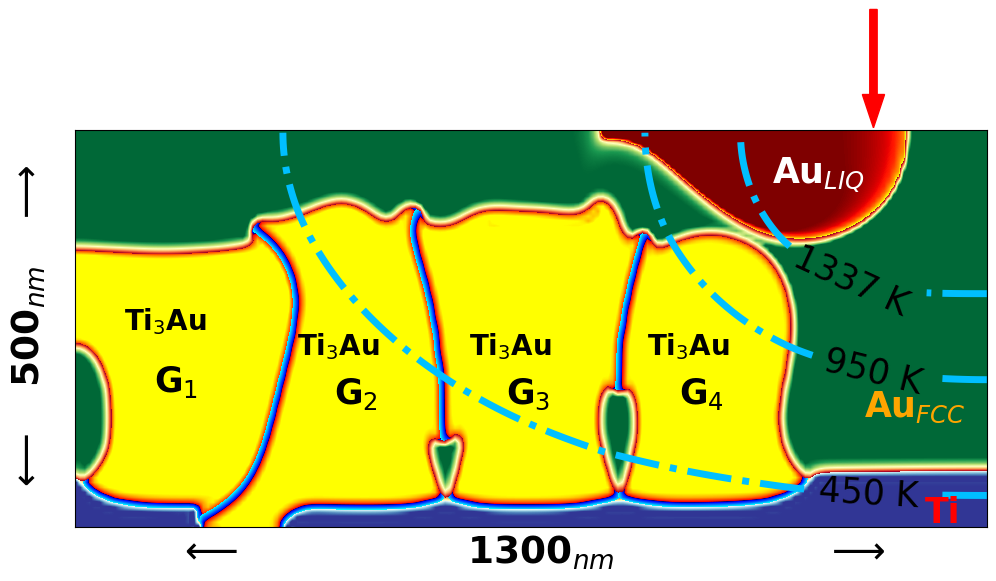

In [33]:
t_step = 640
scan_speed = '5'  # micro meter per sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

mid_dt = int(temp.shape[2]/2) ## To find the Max temperature at the later end of simulation not at the beginning
max_temp_index = np.unravel_index(np.argmax(temp[:,:,mid_dt:]), temp[:,:,mid_dt:].shape)
max_temp_dt = max_temp_index[2]+mid_dt 

laser_off_position = np.unravel_index(np.argmax(temp[:,:,max_temp_dt]), temp[:,:,max_temp_dt].shape)

## Finding the time step at which the specimen cools below melting temperature near the end of simulation  
total_time_steps = temp.shape[2]-1
dt_ = next(dt_ for dt_ in range(total_time_steps, max_temp_dt-1, -1) if np.max(temp[:,:,dt_]) >= 1337)

####################################################



fig, ax1 = plt.subplots(1,1, figsize=(10,6), frameon=True)

cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
Ti_txt = ax1.text(345, 158,'Ti', fontsize = 25, weight='bold', color='red')

cmap=cold2hot
cmap.set_under('white', alpha=0) 
hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
imc1txt3 = ax1.text(20, 80,'Ti$_3$Au', fontsize = 20, weight='bold')
imc1txt3 = ax1.text(32, 105,'G$_{1}$', fontsize = 25, weight='bold')
imc2txt3 = ax1.text(90, 90,'Ti$_3$Au', fontsize = 20, weight='bold')
imc2txt3 = ax1.text(105,110,'G$_{2}$', fontsize = 25, weight='bold')
imc3txt3 = ax1.text(160, 90,'Ti$_3$Au', fontsize = 20, weight='bold')
imc3txt3 = ax1.text(175,110,'G$_{3}$', fontsize = 25, weight='bold')
imc4txt3 = ax1.text(232, 90,'Ti$_3$Au', fontsize = 20, weight='bold')
imc4txt3 = ax1.text(245,110,'G$_{4}$', fontsize = 25, weight='bold')


cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0)
hmap3 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
if t_step<20:
    meltpool_txt = ax1.text(max_temp_pos[1]-18,20,'Au$_{LIQ}$', fontsize = 25, weight='bold', color='white')
else:
    meltpool_txt = ax1.text(meltpool_front[t_step]-45,20,'Au$_{LIQ}$', fontsize = 25, weight='bold', color='white')

cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
hmap4 = ax1.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
AuSOL_txt = ax1.text(320,115,'Au$_{FCC}$', fontsize = 25, weight='bold', color='orange')
# AuSOL_txt = ax1.text(meltpool_front[t_step]+50,30,'Au$_{SOL}$', fontsize = 25, weight='bold', color='orange')

######################### Laser Arrow ###########################
if t_step<=max_temp_dt:
    # ax1.text(max_temp_pos[1]-12,-20, "LASER", rotation=90, color='k', fontsize=20, weight='bold')
    # ax1.text(max_temp_pos[1]+4,-20, "3000 W", rotation=90, color='k', fontsize=15, weight='bold') ## Watt ==> Irradiance
    # ax1.text(max_temp_pos[1]+4,-20, irradiance, rotation=90, color='k', fontsize=15, weight='bold')
    ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 3, color='red', length_includes_head=True, clip_on=False)
    
    # if t_step <150:
        # ax1.arrow(max_temp_pos[1]+18, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        # ax1.text(max_temp_pos[1]+18, -37, s=f'{scan_speed} $nm/ms$', fontsize=20, weight = 'bold')
        # ax1.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='right', fontsize=25, weight='bold')

    # else:
        # ax1.arrow(max_temp_pos[1]-70, -30, 40, 0,  width = 3, color='k', fill=False, clip_on=False)
        # ax1.text(max_temp_pos[1]-70, -37, s=f'{scan_speed} $nm/ms$', fontsize=20, weight = 'bold')
        # ax1.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=25, weight='bold')

else:
    ax1.text(370-50, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(370-40, -15, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(370-5, -30, -55, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.set_title(r't$_{%d}$'%t_step+f'= {real_time[t_step]:.1f} ms', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(laser_off_position[1]-10,-20, irradiance, rotation=90, color='k', alpha=0, fontsize=15, weight='bold')




ax1.set_ylim(160, -1)    
ax1.set_xlim(0,370)

contour_levels = [450, 950,  1337]
contour = ax1.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')


# for l, label in enumerate(custom_labels):
#     clabels[l].set_text(label)
    
################## Dimensions ###################
ax1.set_xlabel('$\longleftarrow$                 1300$_{nm}$                $\longrightarrow$', fontsize = 27, weight ='bold',)
ax1.annotate('$\longleftarrow$   500$_{nm}$   $\longrightarrow$', xy=(0.5, 0.5), xytext=(-0.05, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold',
             color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)



plt.tight_layout()
# plt.savefig('for_manuscript/T_u/F3/I150V5t200.png', bbox_inches='tight', dpi=800)
# plt.savefig('for_manuscript/T_u/F3/jpg/I150V5t200.jpg', bbox_inches='tight')
plt.show()

## Phase without text

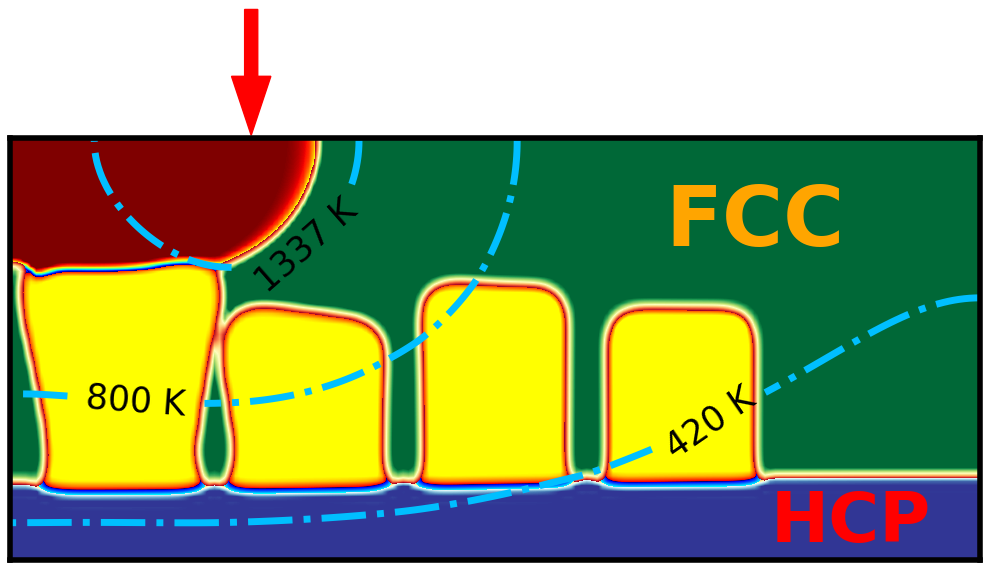

In [8]:
t_step = 49
scan_speed = '5'  # micro meter per sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

fig, ax1 = plt.subplots(1,1, figsize=(10,6), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')
Ti_txt = ax1.text(290, 153,'HCP', fontsize = 50, weight='bold', color='red')

cmap=cold2hot
cmap.set_under('white', alpha=0) 
hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')

cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0)
hmap3 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')

cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
hmap4 = ax1.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
AuSOL_txt = ax1.text(250,40,'FCC', fontsize = 60, weight='bold', color='orange')

ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 5, color='red', length_includes_head=True, clip_on=False)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax1.set_ylim(160, -1)    
ax1.set_xlim(0,370)

contour_levels = [420, 800,  1337]
contour = ax1.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')

ax1.spines[:].set_linewidth(4)

plt.tight_layout()
# plt.savefig('for_manuscript/T_u/F3/jpg/I150V5t40.jpg', bbox_inches='tight')
# plt.savefig('for_manuscript/T_u/F3/I150V5t40.png', bbox_inches='tight', dpi=800)
plt.show()

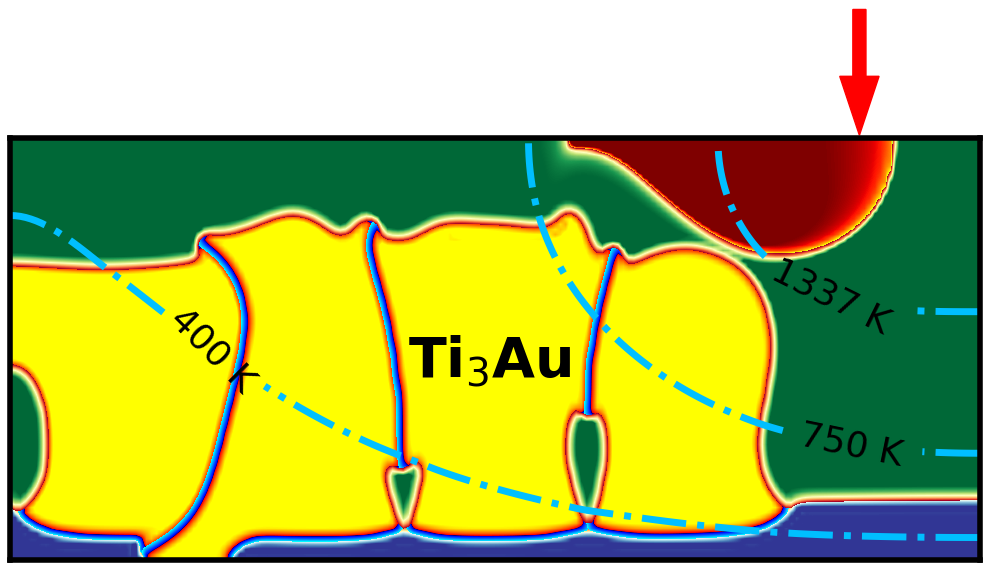

In [11]:
t_step = 640
scan_speed = '5'  # micro meter per sec ==> 5e-4 * t (1e-7m / 1e-9s)
irradiance = r"150 $\mathbf{\frac{kW}{cm^2}}$"

max_temp = round(temp[:,:,t_step].max())
max_temp_pos = np.unravel_index(np.argmax(temp[:,:,t_step]), temp[:,:,t_step].shape)

fig, ax1 = plt.subplots(1,1, figsize=(10,6), frameon=True)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlBu')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(Ti[:,:,t_step], cmap=cmap, vmin=0.3, vmax=1.0, interpolation='bilinear')

cmap=cold2hot
cmap.set_under('white', alpha=0) 
hmap21 = ax1.imshow(IMC1[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap22 = ax1.imshow(IMC2[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap23 = ax1.imshow(IMC3[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
hmap24 = ax1.imshow(IMC4[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')
imc3txt3 = ax1.text(152, 90,'Ti$_3$Au', fontsize = 40, weight='bold')

cmap = plt.get_cmap('jet')
cmap.set_under('white', alpha=0)
hmap3 = ax1.imshow(Au_LIQ[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')

cmap = plt.get_cmap('RdYlGn')
cmap.set_under('white', alpha=0) 
hmap4 = ax1.imshow(Au_SOL[:,:,t_step], cmap=cmap, vmin=0.3, vmax=0.9, interpolation='bilinear')

ax1.arrow(max_temp_pos[1], -50, 0, 48,  width = 5, color='red', length_includes_head=True, clip_on=False)
ax1.set_ylim(160, -1)    
ax1.set_xlim(0,370)

contour_levels = [400, 750,  1337]
contour = ax1.contour(temp[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=26, colors='k', fmt='%1.0f K')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax1.spines[:].set_linewidth(4)

plt.tight_layout()
# plt.savefig('for_manuscript/T_u/F3/jpg/I150V5t200.jpg', bbox_inches='tight')
# plt.savefig('for_manuscript/T_u/F3/I150V5t200.png', bbox_inches='tight', dpi=800)
plt.show()

In [7]:
area_df1['area_h6'][49], area_df1['area_h6'][640]

(57082.375797027, 39262.373465626)